In [1]:
import os
import json

import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

# first part with least squares
from scipy.optimize import curve_fit

# second part about ODR


In [2]:
import csv
import os
directories = os.listdir( 'D:\\DataStore\\CurvesB' )
 
# This would print all the files and directories
print(directories[0])    

02OCDL7HNH.json


In [3]:
def c_s2(v,S,phi0,K):
    return np.where(v<phi0, S*(1-46/(3*phi0*K*S+20-2*v*K*S))+6/K/phi0,S-6/K/phi0 )
    #if (v<phi0):
    #    return S*(1-46/(3*phi0*K*S+20-2*v*K*S))+6/K/phi0
    #else:
    #    return S-6/K/phi0
def c_s1(v,S,phi0,K):
    return 6/K/phi0

def c_phiL(v,S,phi0,K):
    s1=c_s1(v,S,phi0,K)
    s2=c_s2(v,S,phi0,K)
    ds=s2-s1
    return ds,phi0-(v/2/S)*(s1+s2)-(5.75/K/ds)*np.log(s2/s1*(S-s1)/(S-s2))

def I(v,S,phi0,K,R,I0):
    ds,phiL=c_phiL(v,S,phi0,K)
    return  I0+R*v+ 1e6/4e-12*(6.2e10/ds/ds)*(phiL*np.exp(-1.025*ds*phiL**.5)-(phiL+v)*np.exp(-1.025*ds*(phiL+v)**.5) )

def InA(v,S,phi0,K): #returns nA/um^2
    s1=6/K/phi0
    s2=np.where(v<phi0,S*(1-46/(3*phi0*K*S+20-2*v*K*S))+s1 ,(phi0*K*S-28)/K/v )
    ds=s2-s1
    phi=phi0-(v/2/S)*(s1+s2)-(5.75/K/(s2-s1))*np.log(s2/s1*(S-s1)/(S-s2))
    #convert from A/cm^2 to nA/um^2
    return 1e-6/1e-9* (6.2e10/ds/ds)*(  phi*np.exp(-1.025*ds*phi**.5)-(phi+v)*np.exp(-1.025*ds*(phi+v)**.5) )

def I(v,S,phi0,K,R,I0): #returns amps for 1 um^2 device
    It=1e-9* InA(v,S,phi0,K) #back to amps
    return I0+R*v+It


def ISig(v,S,phi0,K,R,I0,SigA,SigV0,SigC):
    ii=I(v,S,phi0,K,R,I0)
    breakD = SigA/(1+np.exp(-1* SigC* (v-SigV0)))
    return ii+breakD



In [4]:
def CutCurves(x,y):
    
    cut=len(x)-1    
    for i in range(len(x)-4):    
        d=x[i+4]-x[i]
        if (d<0):
            cut=i
            break

    x=x[:cut-15]
    y=y[:cut-15]

    y=y[x>.3]
    x=x[x>.3]

    lx=x[x<1.5]
    ly=y[x<1.5]
    m, c = np.polyfit(lx, ly, 1)
   # plt.plot(lx,ly)
   # plt.plot(lx,lx*m+c)
   # plt.show()
    
    std=np.std(ly)
    
    yCut = (m*x[-1]+c)*5
    cut=len(x)
    for i in range(len(x)):
        if y[i]>yCut:
            cut=i
            break

    x=x[:cut]
    y=y[:cut]-(x*m+c)
    
    stdR=np.std(y)/std
    
    return x,y,m,c,stdR,std

In [5]:
plt.plot(x,y)

s=20
phi00= 4
K0=2

v=np.linspace(.0001, 10, num=200)

RDevice=  I(v,s ,phi00 ,K0,0,0) #A
plt.plot(v,RDevice,label="S="+str(s))#
plt.ylim([0, np.max(y)])
print(np.max(RDevice))

NameError: name 'x' is not defined

fileN:0,02OCDL7HNH.json
flat
fileN:1,02VA1ZR9VC.json
fileN:2,038SBKEUL6.json
flat
fileN:3,03YJPI0MWY.json
fileN:4,06VFMDJI3M.json
flat
fileN:5,08039O8PMQ.json
fileN:6,095KWV48EG.json
fileN:7,09XXXJJZGV.json
flat
fileN:8,0AE6EQSBUN.json
Sigma
S=17.94,Phi=4.22,K0=3.66,Con=1.09e-06,cap=2.96e-05,Vcrit=2.88


c:\pythonproj\tfgpu\lib\site-packages\numpy\core\_methods.py:233: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
c:\pythonproj\tfgpu\lib\site-packages\numpy\core\_methods.py:194: RuntimeWarning: invalid value encountered in true_divide
  arrmean = um.true_divide(
c:\pythonproj\tfgpu\lib\site-packages\numpy\core\_methods.py:226: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


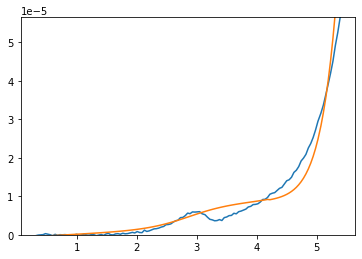

fileN:9,0B9FOIVC0S.json
fileN:10,0FXLE5HH5E.json
flat
fileN:11,0I2EAWCB21.json
Sigma
S=23.75,Phi=4.27,K0=3.70,Con=9.10e-07,cap=2.85e-05,Vcrit=3.19


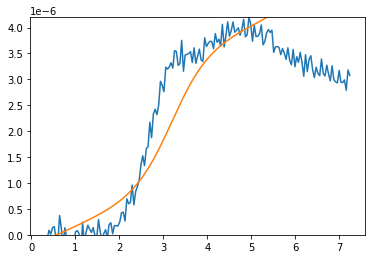

fileN:12,0ILMP6827D.json
Sigma
S=19.62,Phi=4.21,K0=3.64,Con=-1.18e-07,cap=3.00e-05,Vcrit=3.00


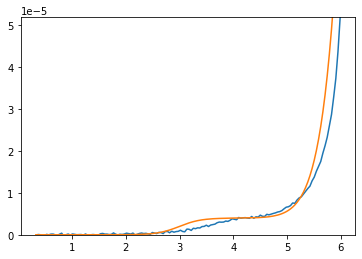

fileN:13,0J4SMHZVNN.json
flat
fileN:14,0PAA7BPWNR.json
fileN:15,0QDL49Y82G.json
Sigma
fileN:16,0R7PA9XB7B.json
fileN:17,0TJWGPLYU1.json
fileN:18,0TKD3T433N.json
flat
fileN:19,0UFWY3X29T.json
Sigma
S=19.46,Phi=4.21,K0=3.64,Con=-7.04e-08,cap=3.00e-05,Vcrit=2.97


<ipython-input-9-41611301a7aa>:35: RuntimeWarning: divide by zero encountered in double_scalars
  stdR=np.std(y)/std


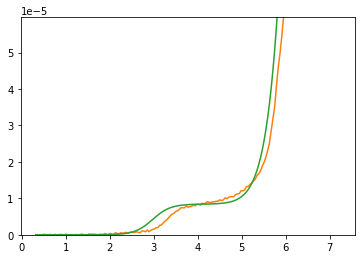

fileN:20,0ULZVS4YG4.json
Sigma
S=23.60,Phi=4.26,K0=3.70,Con=1.99e-06,cap=2.78e-05,Vcrit=3.91


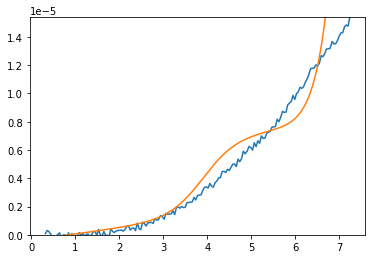

fileN:21,0WUJUZNE9L.json
Sigma
fileN:22,0XCI1VIW8Z.json
flat
fileN:23,0XK07DR3S4.json
Sigma
S=14.85,Phi=4.20,K0=3.64,Con=1.60e-07,cap=2.96e-05,Vcrit=2.03


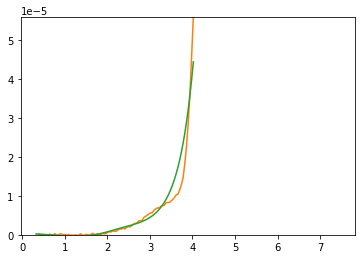

fileN:24,0YCWN4EON7.json
fileN:25,0YDK5TDYN4.json
fileN:26,0YH2EYWENW.json
flat
fileN:27,10QSYX11QD.json
flat
fileN:28,118Y7WZI1R.json
Sigma
S=23.74,Phi=4.27,K0=3.70,Con=1.14e-06,cap=2.82e-05,Vcrit=3.18


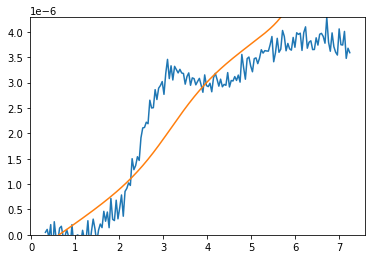

fileN:29,12E8TI8H71.json
fileN:30,15TXEYCNI4.json
flat
fileN:31,17XZ52PMKI.json
flat
fileN:32,18ONQ0N1GG.json
fileN:33,18WE27AHUX.json
Sigma
S=19.11,Phi=4.21,K0=3.63,Con=1.00e-06,cap=2.85e-05,Vcrit=2.92


c:\pythonproj\tfgpu\lib\site-packages\numpy\core\_methods.py:233: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
c:\pythonproj\tfgpu\lib\site-packages\numpy\core\_methods.py:194: RuntimeWarning: invalid value encountered in true_divide
  arrmean = um.true_divide(
c:\pythonproj\tfgpu\lib\site-packages\numpy\core\_methods.py:226: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


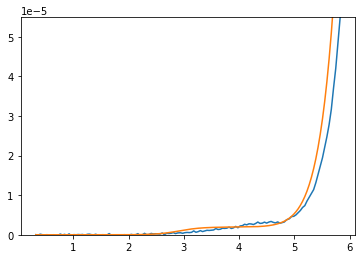

fileN:34,1B8V2TYO37.json
fileN:35,1BL59S4O5E.json
fileN:36,1BPW56Z9KO.json
fileN:37,1BST1T4ULC.json
flat
fileN:38,1EZW5GYWEO.json
fileN:39,1GV04UDDJ1.json
flat
fileN:40,1IGASZHPUO.json
flat
fileN:41,1JIV0MRU11.json
Sigma
S=23.72,Phi=4.27,K0=3.70,Con=-6.32e-08,cap=2.98e-05,Vcrit=3.95


c:\pythonproj\tfgpu\lib\site-packages\numpy\core\_methods.py:233: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
c:\pythonproj\tfgpu\lib\site-packages\numpy\core\_methods.py:194: RuntimeWarning: invalid value encountered in true_divide
  arrmean = um.true_divide(
c:\pythonproj\tfgpu\lib\site-packages\numpy\core\_methods.py:226: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


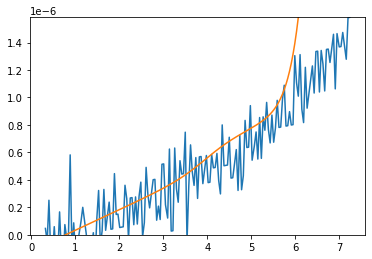

fileN:42,1K0NUO8A2O.json
fileN:43,1K8W1B42K6.json
fileN:44,1KBSNRNHSP.json
fileN:45,1N6W6A8E7N.json
fileN:46,1NVLGZ0F1C.json
Sigma
S=14.93,Phi=4.20,K0=3.73,Con=1.36e-07,cap=2.85e-05,Vcrit=2.11


<ipython-input-9-41611301a7aa>:35: RuntimeWarning: divide by zero encountered in double_scalars
  stdR=np.std(y)/std


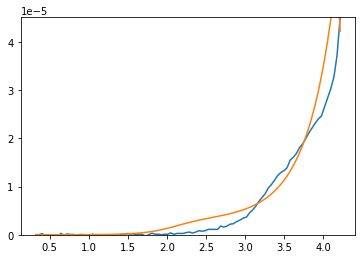

c:\pythonproj\tfgpu\lib\site-packages\numpy\core\_methods.py:233: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
c:\pythonproj\tfgpu\lib\site-packages\numpy\core\_methods.py:194: RuntimeWarning: invalid value encountered in true_divide
  arrmean = um.true_divide(
c:\pythonproj\tfgpu\lib\site-packages\numpy\core\_methods.py:226: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


fileN:47,1O6AEJR7UN.json
flat
fileN:48,1R5IJ9T50V.json
Sigma
S=17.56,Phi=4.22,K0=3.66,Con=8.94e-07,cap=2.92e-05,Vcrit=2.97


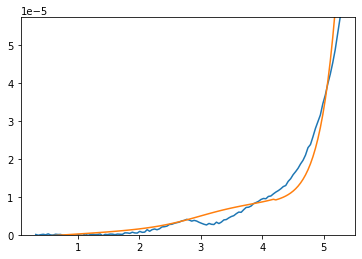

fileN:49,1RDWCXIUDL.json
flat
fileN:50,1SMJU6F7XR.json
Sigma
S=21.48,Phi=4.24,K0=3.66,Con=2.26e-07,cap=2.85e-05,Vcrit=3.28


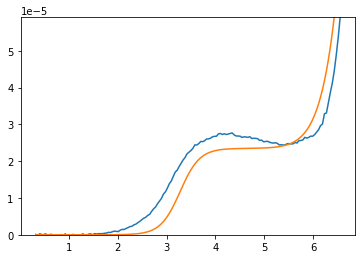

fileN:51,1SYS98KZYH.json
Sigma
S=15.66,Phi=4.27,K0=3.61,Con=-3.58e-07,cap=2.88e-05,Vcrit=2.37


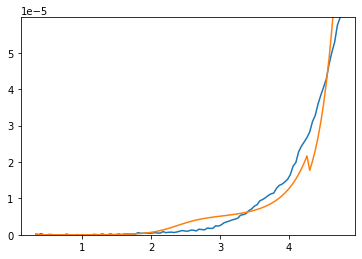

fileN:52,1TFVBD8076.json
Sigma
S=23.77,Phi=4.27,K0=3.70,Con=5.67e-08,cap=3.01e-05,Vcrit=3.21


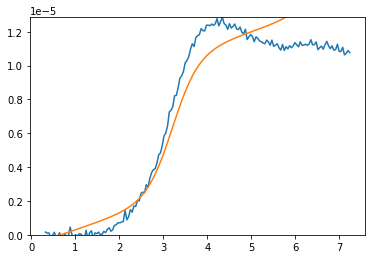

fileN:53,1XWOWI7XMI.json
flat
fileN:54,1YIRORDKOA.json
Sigma
fileN:55,20OW2410UF.json
Sigma
S=23.71,Phi=4.27,K0=3.70,Con=1.07e-07,cap=2.90e-05,Vcrit=3.92


<ipython-input-9-41611301a7aa>:35: RuntimeWarning: divide by zero encountered in double_scalars
  stdR=np.std(y)/std


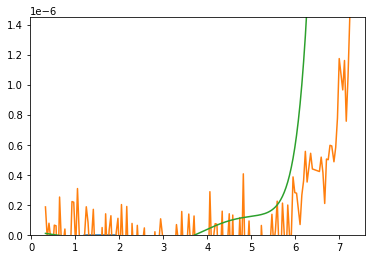

fileN:56,22JLEX8J2Y.json
flat
fileN:57,25P8K1H9PZ.json
flat
fileN:58,28CWKI7O6R.json
fileN:59,2A4PTHK8A4.json
S=23.15,Phi=4.22,K0=3.64,-1.85e-07,1.37e-07


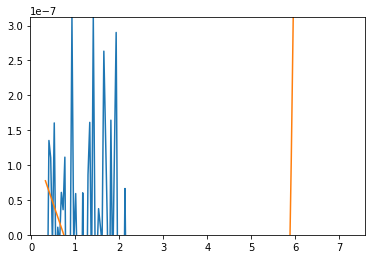

fileN:60,2B8CZXL0HJ.json
Sigma
fileN:61,2CAZJGIB82.json
fileN:62,2EJRN183AE.json
flat
fileN:63,2IGCX1GMTK.json
fileN:64,2IRC2TKBEM.json
fileN:65,2KP32FTINO.json
flat
fileN:66,2L6XZ3QC9G.json
fileN:67,2NAL9NW9B4.json
flat
fileN:68,2O81RM5WWW.json
flat
fileN:69,2RP83NELYE.json
flat
fileN:70,2TT9LPEXGZ.json
flat
fileN:71,2U31BD2Y8R.json
flat
fileN:72,2VDAXLDB1O.json
flat
fileN:73,2VI35NI5KA.json
Sigma
S=23.59,Phi=4.26,K0=3.68,Con=1.04e-06,cap=2.97e-05,Vcrit=3.40


c:\pythonproj\tfgpu\lib\site-packages\numpy\core\_methods.py:233: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
c:\pythonproj\tfgpu\lib\site-packages\numpy\core\_methods.py:194: RuntimeWarning: invalid value encountered in true_divide
  arrmean = um.true_divide(
c:\pythonproj\tfgpu\lib\site-packages\numpy\core\_methods.py:226: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


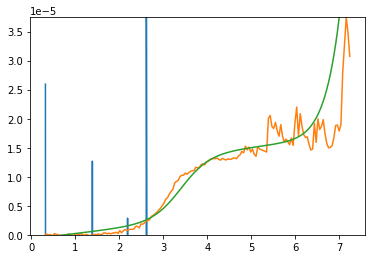

fileN:74,2XBMDGMPNY.json


<ipython-input-9-41611301a7aa>:35: RuntimeWarning: divide by zero encountered in double_scalars
  stdR=np.std(y)/std


Sigma
fileN:75,2XJRZMTJ3M.json
fileN:76,31GMLK021X.json
flat
fileN:77,331MWVVGV6.json
S=23.15,Phi=4.22,K0=3.64,-1.23e-06,8.65e-07


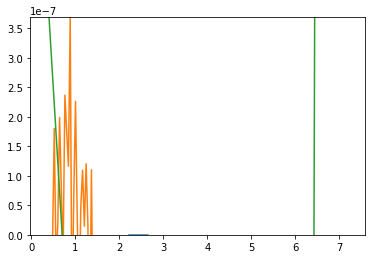

fileN:78,35SBVN1HSD.json
flat
fileN:79,3C5GGD8LB2.json
flat
fileN:80,3E5FCUIZ5U.json
flat
fileN:81,3GFVNMTLYW.json
flat
fileN:82,3GJ4BJ9HA3.json
flat
fileN:83,3GJXA1YIET.json
flat
fileN:84,3HY2MBWH1O.json


c:\pythonproj\tfgpu\lib\site-packages\numpy\core\_methods.py:233: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
c:\pythonproj\tfgpu\lib\site-packages\numpy\core\_methods.py:194: RuntimeWarning: invalid value encountered in true_divide
  arrmean = um.true_divide(
c:\pythonproj\tfgpu\lib\site-packages\numpy\core\_methods.py:226: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


fileN:85,3IU68VHJCK.json
Sigma
fileN:86,3J13O5GNEG.json
S=34.07,Phi=7.02,K0=4.90,-9.70e-05,-9.92e-05


<ipython-input-9-41611301a7aa>:35: RuntimeWarning: divide by zero encountered in double_scalars
  stdR=np.std(y)/std


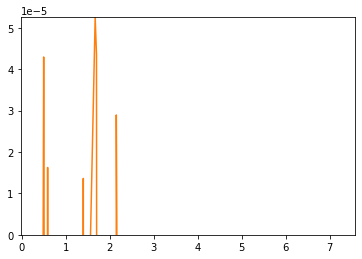

fileN:87,3KB7P9PSXY.json
fileN:88,3M8U0VRW3W.json
flat
fileN:89,3NYSW76VWT.json
Sigma
fileN:90,3OSK0ROAH8.json
Sigma
fileN:91,3PFPLH7OI9.json
Sigma
fileN:92,3QY2TRRY1W.json
fileN:93,3RXFWFNWAE.json

<ipython-input-9-41611301a7aa>:35: RuntimeWarning: divide by zero encountered in double_scalars
  stdR=np.std(y)/std
<ipython-input-9-41611301a7aa>:35: RuntimeWarning: divide by zero encountered in double_scalars
  stdR=np.std(y)/std



fileN:94,3UOF3F1TFV.json
fileN:95,3VAMAFN5AL.json
Sigma
S=21.83,Phi=4.22,K0=3.66,Con=1.52e-06,cap=2.86e-05,Vcrit=3.35


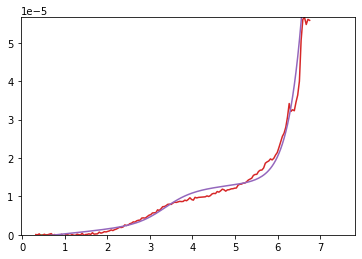

fileN:96,3VQ50MN6NO.json
flat
fileN:97,3WW37DMZUN.json
fileN:98,3X2CH8JKEE.json
S=16.61,Phi=4.25,K0=3.64,4.51e-06,-3.32e-06


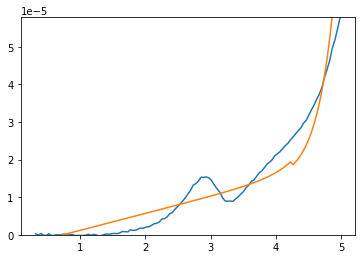

fileN:99,3Y6R8JI7HP.json
fileN:100,3ZA4TYAA02.json
Sigma
S=23.73,Phi=4.27,K0=3.70,Con=9.61e-07,cap=2.86e-05,Vcrit=3.44


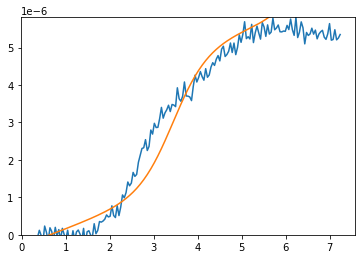

fileN:101,416WRAG9KU.json
fileN:102,41OKITHC74.json
flat
fileN:103,447UNG7V5K.json
flat
fileN:104,45B9NP2OXB.json
flat
fileN:105,4603JMTNSD.json
fileN:106,46E6H1QZ4X.json
S=14.85,Phi=4.22,K0=3.68,1.27e-06,-9.19e-07


c:\pythonproj\tfgpu\lib\site-packages\numpy\core\_methods.py:233: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
c:\pythonproj\tfgpu\lib\site-packages\numpy\core\_methods.py:194: RuntimeWarning: invalid value encountered in true_divide
  arrmean = um.true_divide(
c:\pythonproj\tfgpu\lib\site-packages\numpy\core\_methods.py:226: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


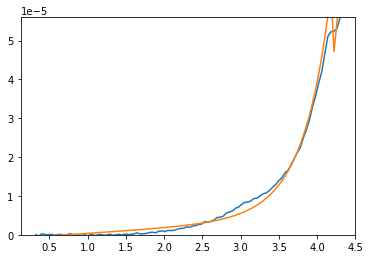

fileN:107,46KZ4WCHWZ.json
S=13.36,Phi=4.35,K0=3.74,-5.23e-07,2.48e-08


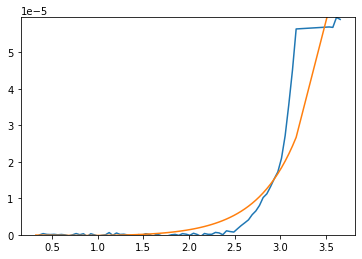

fileN:108,46QSQTLRT6.json
fileN:109,477ZIE8AOW.json
Sigma
S=23.75,Phi=4.27,K0=3.70,Con=7.35e-07,cap=2.86e-05,Vcrit=3.40


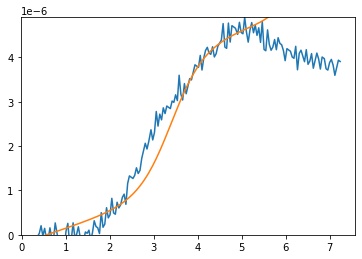

fileN:110,47POH3MVYV.json
flat
fileN:111,4B3832KC8G.json
Sigma
fileN:112,4C2NY5TLMV.json
fileN:113,4EQ1FE0HC0.json
flat
fileN:114,4H70L84PI1.json
flat
fileN:115,4KHDXAT1CB.json
flat
fileN:116,4NNH64RHWW.json
fileN:117,4NPGQIGLXA.json
flat
fileN:118,4O98PHAVCL.json
fileN:119,4OB6F03FCC.json
fileN:120,4S0ORYIBQ6.json
S=23.10,Phi=4.21,K0=3.64,6.29e-08,-9.50e-08


c:\pythonproj\tfgpu\lib\site-packages\numpy\core\_methods.py:233: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
c:\pythonproj\tfgpu\lib\site-packages\numpy\core\_methods.py:194: RuntimeWarning: invalid value encountered in true_divide
  arrmean = um.true_divide(
c:\pythonproj\tfgpu\lib\site-packages\numpy\core\_methods.py:226: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


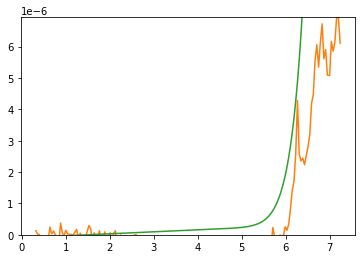

fileN:121,4SL3UKV4ZG.json
S=23.09,Phi=4.21,K0=3.64,6.68e-08,-9.82e-08


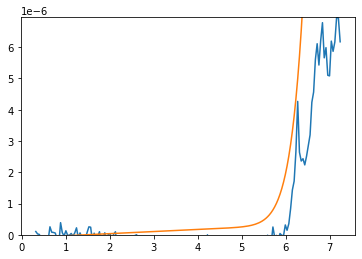

fileN:122,4SRAAB8VJD.json
flat
fileN:123,4T3OBS2PEW.json
flat
fileN:124,4WEWMTYAPK.json
fileN:125,4YLLJZL5RN.json
fileN:126,4YX878J09U.json
fileN:127,4ZAPA3NXWY.json
fileN:128,50EZPBV1YC.json
flat
fileN:129,52GT8RRFRW.json
flat
fileN:130,52LF8S1VJO.json
fileN:131,53G1WHS2NF.json
fileN:132,5469UU4328.json
fileN:133,5626R7Q9ZR.json
fileN:134,578NP8UT9S.json
fileN:135,57DUWH7SAZ.json
Sigma
S=18.21,Phi=4.22,K0=3.65,Con=1.14e-06,cap=2.87e-05,Vcrit=3.14


<ipython-input-9-41611301a7aa>:35: RuntimeWarning: divide by zero encountered in double_scalars
  stdR=np.std(y)/std
c:\pythonproj\tfgpu\lib\site-packages\numpy\core\_methods.py:233: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
c:\pythonproj\tfgpu\lib\site-packages\numpy\core\_methods.py:194: RuntimeWarning: invalid value encountered in true_divide
  arrmean = um.true_divide(
c:\pythonproj\tfgpu\lib\site-packages\numpy\core\_methods.py:226: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


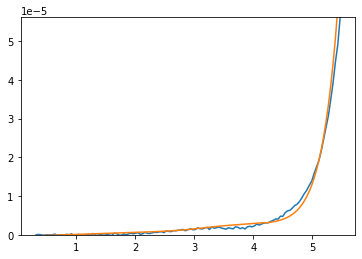

fileN:136,58N7F4FCIG.json
flat
fileN:137,5BT1QR9RJM.json
flat
fileN:138,5C2TPOTIZV.json
flat
fileN:139,5DV9XQTWUY.json


c:\pythonproj\tfgpu\lib\site-packages\numpy\core\_methods.py:233: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
c:\pythonproj\tfgpu\lib\site-packages\numpy\core\_methods.py:194: RuntimeWarning: invalid value encountered in true_divide
  arrmean = um.true_divide(
c:\pythonproj\tfgpu\lib\site-packages\numpy\core\_methods.py:226: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Sigma
S=23.61,Phi=4.26,K0=3.70,Con=4.71e-07,cap=2.83e-05,Vcrit=3.86


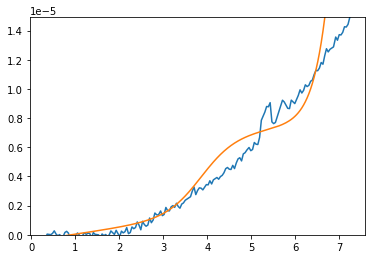

fileN:140,5E6XHGD6YZ.json
fileN:141,5FQT3LN6E1.json
Sigma
S=14.47,Phi=4.26,K0=3.67,Con=5.58e-06,cap=1.88e-05,Vcrit=1.86


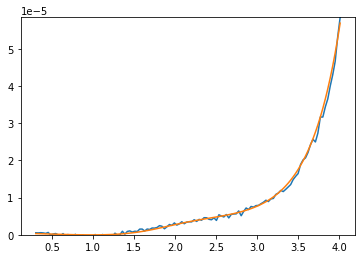

fileN:142,5FUHEGN9FO.json
flat
fileN:143,5J2S6ZDWNH.json
fileN:144,5JA9E0HWME.json
flat
fileN:145,5K2UUUIHQR.json
fileN:146,5K75VLDW9K.json
fileN:147,5LZB3F6GZ3.json
flat
fileN:148,5N3GB33LAD.json
fileN:149,5N3ZEXWLKF.json
fileN:150,5NGT46YJXO.json
flat
fileN:151,5PUWB2YRE0.json
Sigma
S=14.46,Phi=4.24,K0=3.66,Con=1.12e-07,cap=2.87e-05,Vcrit=2.01


<ipython-input-9-41611301a7aa>:35: RuntimeWarning: divide by zero encountered in double_scalars
  stdR=np.std(y)/std


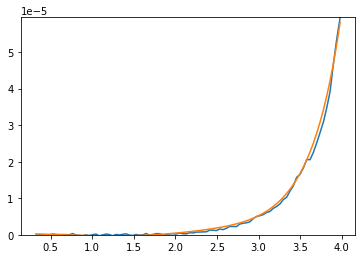

fileN:152,5TCSPH5VOC.json
flat
fileN:153,5VENKPA4VQ.json
Sigma
S=16.36,Phi=4.24,K0=3.63,Con=8.47e-07,cap=2.95e-05,Vcrit=2.45


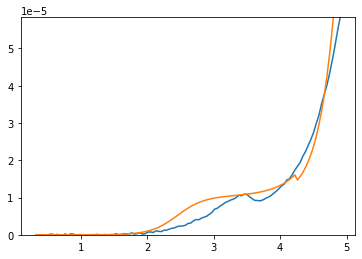

fileN:154,5XMQSEMRUM.json
flat
fileN:155,5YPRQ9D0ZK.json
flat
fileN:156,62IFXR99ZW.json
fileN:157,62L11IDBIJ.json
flat
fileN:158,668049S87K.json
Sigma
fileN:159,67HICXJ3T5.json
Sigma
fileN:160,69TYQIQRQ6.json
fileN:161,6C6SEQOMCR.json
fileN:162,6CYKO3LWCE.json
fileN:163,6D4ICTJD8K.json
fileN:164,6DA5XQPEHA.json
Sigma
S=17.38,Phi=4.21,K0=3.66,Con=1.89e-06,cap=2.83e-05,Vcrit=3.82


<ipython-input-9-41611301a7aa>:35: RuntimeWarning: divide by zero encountered in double_scalars
  stdR=np.std(y)/std


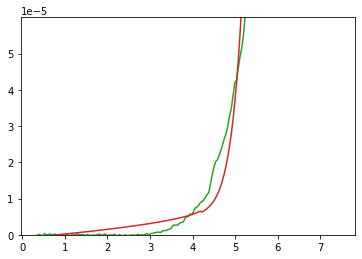

fileN:165,6EMRANOKTL.json
fileN:166,6ENHAQDBZ7.json
S=23.09,Phi=4.21,K0=3.64,-6.47e-08,3.05e-08


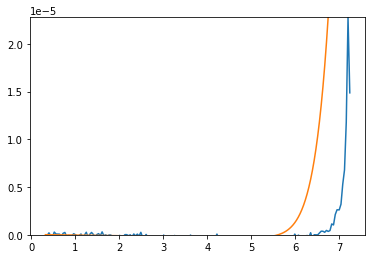

fileN:167,6ET34L8D44.json
flat
fileN:168,6GQ6A20Y8X.json
fileN:169,6HEN5HHON9.json
fileN:170,6LCFJIDPZ1.json
fileN:171,6M9FZQ7OCX.json
fileN:172,6MOSSJKG63.json
fileN:173,6O17X1VJJC.json
flat
fileN:174,6OO9DT84JN.json
flat
fileN:175,6S70GKWXCB.json
fileN:176,6SG9CQ7SS5.json
flat
fileN:177,6SH9WE2S5D.json
flat
fileN:178,6VN1F33ZKX.json
fileN:179,6X42CEJH9O.json
Sigma
fileN:180,6Y8ABKPXXE.json
fileN:181,6ZFZ0JCASP.json
fileN:182,70PQFY8RAG.json
flat
fileN:183,719IVU67XS.json
Sigma
fileN:184,71T6PJ178M.json
S=13.36,Phi=4.35,K0=3.74,-5.23e-07,2.48e-08


c:\pythonproj\tfgpu\lib\site-packages\numpy\core\_methods.py:233: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
c:\pythonproj\tfgpu\lib\site-packages\numpy\core\_methods.py:194: RuntimeWarning: invalid value encountered in true_divide
  arrmean = um.true_divide(
c:\pythonproj\tfgpu\lib\site-packages\numpy\core\_methods.py:226: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


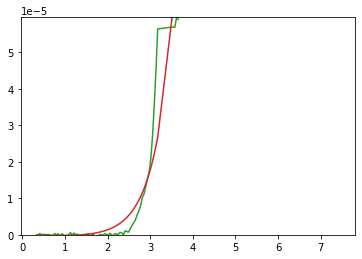

fileN:185,722ZR3CP74.json
fileN:186,74RJA568F7.json
fileN:187,74W4D9UH3D.json
fileN:188,74W82IDJ6I.json
S=23.13,Phi=4.22,K0=3.64,-1.85e-08,-1.81e-08


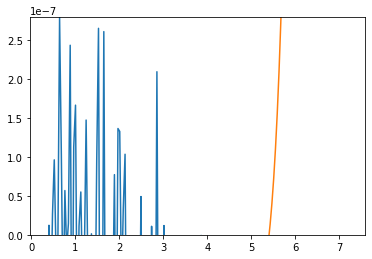

fileN:189,77NP6T5JL3.json
fileN:190,78VB7Y6YKG.json
flat
fileN:191,79KZIG0VPJ.json
fileN:192,7AT5XHOH0O.json
fileN:193,7BF460KWNW.json
Sigma
S=23.95,Phi=4.29,K0=3.71,Con=3.12e-06,cap=2.75e-05,Vcrit=2.06


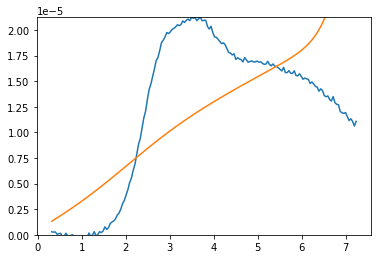

fileN:194,7CISN6OF0U.json
flat
fileN:195,7DAFED2B7R.json
fileN:196,7DF9DHRGNE.json
fileN:197,7G26UZUC84.json
fileN:198,7HL05VNC01.json
S=23.14,Phi=4.22,K0=3.64,-2.08e-07,1.52e-07


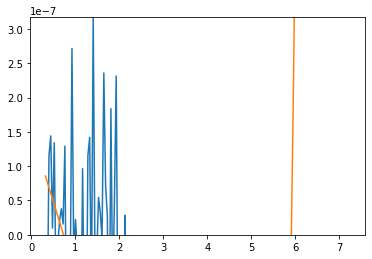

fileN:199,7JCEOJ7NXA.json
fileN:200,7L5Y7GZTZI.json
fileN:201,7L7XTTD3FJ.json
flat
fileN:202,7LTIFC42U9.json
Sigma
S=23.71,Phi=4.27,K0=3.70,Con=-2.80e-09,cap=2.85e-05,Vcrit=3.89


c:\pythonproj\tfgpu\lib\site-packages\numpy\core\_methods.py:233: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
c:\pythonproj\tfgpu\lib\site-packages\numpy\core\_methods.py:194: RuntimeWarning: invalid value encountered in true_divide
  arrmean = um.true_divide(
c:\pythonproj\tfgpu\lib\site-packages\numpy\core\_methods.py:226: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


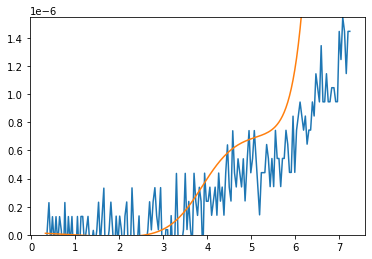

fileN:203,7LYFJKJKDR.json
Sigma
fileN:204,7OKJRQKPV2.json
S=16.37,Phi=4.10,K0=3.55,-9.73e-05,-9.97e-05


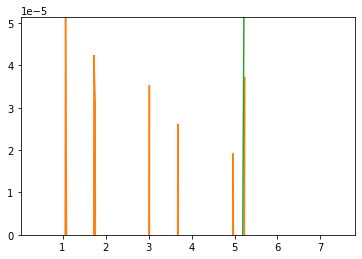

fileN:205,7PWXE0K6EJ.json
fileN:206,7QU03U51D8.json
fileN:207,7RQNLA4UCF.json
flat
fileN:208,7SSB1GA8ZY.json
flat
fileN:209,7WYBX7O9OO.json
flat
fileN:210,7ZYHJR030N.json
fileN:211,80V5L2S2JD.json
fileN:212,838OIXQ6QQ.json
fileN:213,83USNKFMFQ.json
flat
fileN:214,885GPX4K79.json
fileN:215,8AF5XLZ90R.json
fileN:216,8AWRWACKPC.json
fileN:217,8B5HL9IOKE.json
flat
fileN:218,8CAMNN2DV0.json
fileN:219,8CKSBM5G9Y.json
flat
fileN:220,8EF2W8OEV4.json
flat
fileN:221,8FGJZLR4U7.json
Sigma
S=23.71,Phi=4.27,K0=3.70,Con=-6.62e-08,cap=2.97e-05,Vcrit=3.98


<ipython-input-9-41611301a7aa>:35: RuntimeWarning: divide by zero encountered in double_scalars
  stdR=np.std(y)/std
c:\pythonproj\tfgpu\lib\site-packages\numpy\core\_methods.py:233: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
c:\pythonproj\tfgpu\lib\site-packages\numpy\core\_methods.py:194: RuntimeWarning: invalid value encountered in true_divide
  arrmean = um.true_divide(
c:\pythonproj\tfgpu\lib\site-packages\numpy\core\_methods.py:226: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


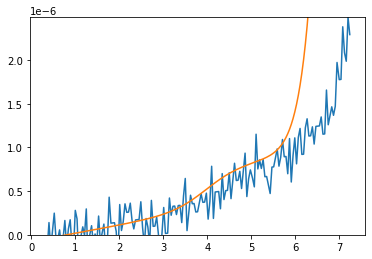

fileN:222,8INQOQ65VF.json
fileN:223,8IVOTKAEF5.json
fileN:224,8J776JQXA8.json
fileN:225,8K4EVOLQRY.json
fileN:226,8LTUP8ZUH1.json
flat
fileN:227,8MI9VGH9FQ.json
fileN:228,8OBFV6LJPX.json
fileN:229,8OKBFZSIU5.json
S=22.99,Phi=4.21,K0=3.64,2.38e-08,-2.46e-08


c:\pythonproj\tfgpu\lib\site-packages\numpy\core\_methods.py:233: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
c:\pythonproj\tfgpu\lib\site-packages\numpy\core\_methods.py:194: RuntimeWarning: invalid value encountered in true_divide
  arrmean = um.true_divide(
c:\pythonproj\tfgpu\lib\site-packages\numpy\core\_methods.py:226: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


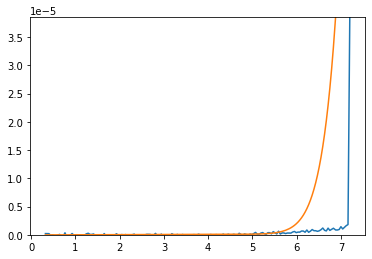

fileN:230,8QQIJRNOST.json
fileN:231,8T33072R3D.json
fileN:232,8U0J9JVP2W.json
fileN:233,8X09DANT69.json
flat
fileN:234,8XW3JH6H05.json
Sigma
S=15.58,Phi=4.19,K0=3.64,Con=7.33e-07,cap=2.81e-05,Vcrit=2.27


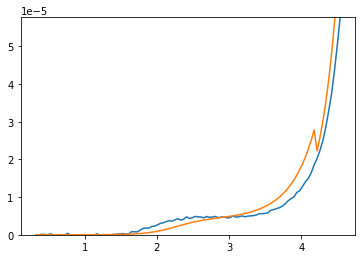

fileN:235,900YUUEMNZ.json
Sigma
fileN:236,90ZII3CQ81.json
fileN:237,91DT4W7SX7.json
flat
fileN:238,92ZS1SIDTV.json
flat
fileN:239,93D09KIH0N.json
flat
fileN:240,93RC76SI3W.json
flat
fileN:241,974IR489BU.json
fileN:242,978HT2FML7.json
flat
fileN:243,986KRXHRH4.json
flat
fileN:244,9EGDUHHDFP.json
Sigma
S=23.72,Phi=4.27,K0=3.70,Con=-2.79e-07,cap=2.84e-05,Vcrit=3.80


<ipython-input-9-41611301a7aa>:35: RuntimeWarning: divide by zero encountered in double_scalars
  stdR=np.std(y)/std
c:\pythonproj\tfgpu\lib\site-packages\numpy\core\_methods.py:233: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
c:\pythonproj\tfgpu\lib\site-packages\numpy\core\_methods.py:194: RuntimeWarning: invalid value encountered in true_divide
  arrmean = um.true_divide(
c:\pythonproj\tfgpu\lib\site-packages\numpy\core\_methods.py:226: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


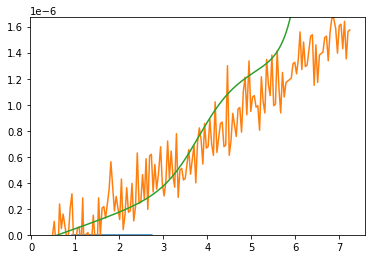

fileN:245,9EY70P1Z70.json
S=23.08,Phi=4.21,K0=3.64,-5.14e-08,2.48e-08


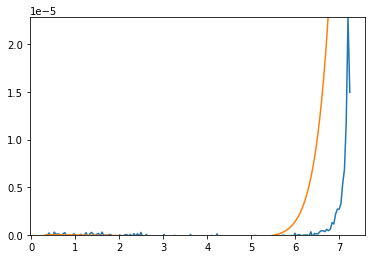

fileN:246,9F6Y8KPDT7.json
Sigma
S=23.74,Phi=4.27,K0=3.70,Con=8.02e-07,cap=2.81e-05,Vcrit=3.30


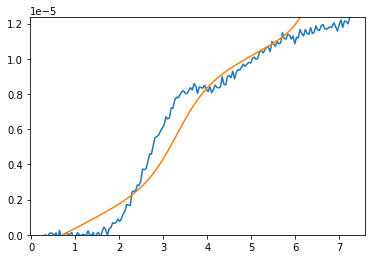

fileN:247,9HQJ5WT456.json
flat
fileN:248,9IOJJTZ80S.json
fileN:249,9KF0BC752N.json
fileN:250,9M7OQEXW6Z.json
Sigma
fileN:251,9MM4CCZC5S.json
fileN:252,9MMBHETRPM.json
fileN:253,9OWEO2F19F.json
flat
fileN:254,9P29XWF55B.json
flat
fileN:255,9PGRLDULAH.json
fileN:256,9PM76CCU8A.json
fileN:257,9QMF4O6UEW.json
fileN:258,9QWRKEOUX6.json
flat
fileN:259,9RCZR6MH3H.json
Sigma
S=23.64,Phi=4.26,K0=3.69,Con=5.66e-08,cap=2.87e-05,Vcrit=3.81


<ipython-input-9-41611301a7aa>:35: RuntimeWarning: divide by zero encountered in double_scalars
  stdR=np.std(y)/std
c:\pythonproj\tfgpu\lib\site-packages\numpy\core\_methods.py:233: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
c:\pythonproj\tfgpu\lib\site-packages\numpy\core\_methods.py:194: RuntimeWarning: invalid value encountered in true_divide
  arrmean = um.true_divide(
c:\pythonproj\tfgpu\lib\site-packages\numpy\core\_methods.py:226: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


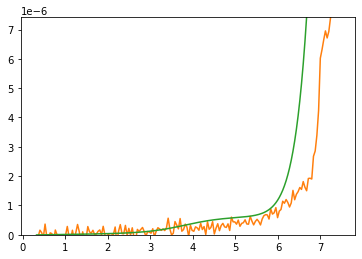

<ipython-input-9-41611301a7aa>:35: RuntimeWarning: divide by zero encountered in double_scalars
  stdR=np.std(y)/std


fileN:260,9RRHSZPMPG.json
Sigma
S=23.64,Phi=4.26,K0=3.69,Con=4.20e+28,cap=9.91e+43,Vcrit=3.81


<ipython-input-14-9e241a68c336>:85: UserWarning: Attempting to set identical bottom == top == 0 results in singular transformations; automatically expanding.
  plt.ylim([0,np.max(y)])


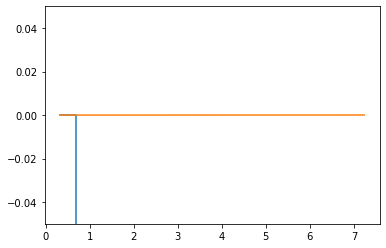

fileN:261,9SZNZUP2N3.json
Sigma
S=14.47,Phi=4.23,K0=3.66,Con=1.13e-07,cap=2.87e-05,Vcrit=2.01


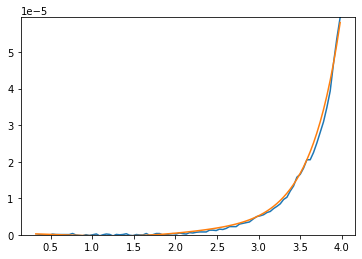

fileN:262,9VDE1JZL05.json
fileN:263,9W7CL3YUJ7.json
flat
fileN:264,9X1YPLWXJ2.json
flat
fileN:265,9XAF3FRK37.json
flat
fileN:266,9XRH5VMVXQ.json
flat
fileN:267,A0UPHJQ2Y1.json
fileN:268,A2H3N3HX4P.json
flat
fileN:269,A3V5T02JOY.json
fileN:270,A4EFPYQ99N.json
flat
fileN:271,A4TRK58PIN.json
fileN:272,A5YQRHNEM2.json
Sigma
fileN:273,A6VAG5OHZ6.json
fileN:274,AAIT2AYJB3.json
flat
fileN:275,ABC7R67Q0R.json
Sigma
fileN:276,ACSYIGPE0C.json
flat
fileN:277,ADEMA9CSTY.json
fileN:278,AEE4PFQQ3B.json
fileN:279,AEXU8JJK39.json
flat
fileN:280,AGL93Z6AS9.json
fileN:281,AH609R7M56.json
Sigma
S=18.21,Phi=4.22,K0=3.65,Con=1.79e-06,cap=2.87e-05,Vcrit=3.05


c:\pythonproj\tfgpu\lib\site-packages\numpy\core\_methods.py:233: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
c:\pythonproj\tfgpu\lib\site-packages\numpy\core\_methods.py:194: RuntimeWarning: invalid value encountered in true_divide
  arrmean = um.true_divide(
c:\pythonproj\tfgpu\lib\site-packages\numpy\core\_methods.py:226: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
c:\pythonproj\tfgpu\lib\site-packages\numpy\core\_methods.py:233: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
c:\pythonproj\tfgpu\lib\site-packages\numpy\core\_methods.py:194: RuntimeWarning: invalid value encountered in true_divide
  arrmean = um.true_divide(
c:\pythonproj\tfgpu\lib\site-packages\numpy\core\_methods.py:226: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


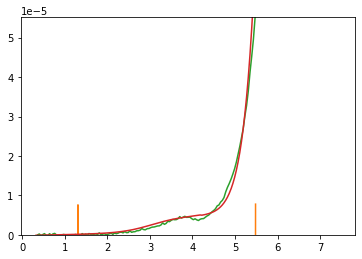

fileN:282,AIIIEBNZ8J.json
fileN:283,AKR7C8Z3IY.json
fileN:284,AL8OT01ZHZ.json
fileN:285,APJTU9RXMG.json
Sigma
S=15.30,Phi=4.13,K0=3.72,Con=5.56e-08,cap=2.84e-05,Vcrit=2.49


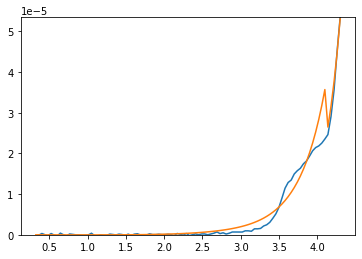

fileN:286,ARH5SN7NW1.json
flat
fileN:287,ASYX0OL1FD.json
fileN:288,AUS1U0IO41.json
fileN:289,AXDYRLVT52.json
flat
fileN:290,AZ4GG3OS0N.json
fileN:291,B10XNRRQC8.json
fileN:292,B128AFWGVR.json
fileN:293,B1LJ37VYCI.json
flat
fileN:294,B2HQ539BD7.json
fileN:295,B2T20RIM9I.json
fileN:296,B3IRCPV8OJ.json
flat
fileN:297,B4K4UNXG0W.json
flat
fileN:298,B51ABSM5WS.json
fileN:299,B5FL02D18H.json
flat
fileN:300,BAKJNQBTHO.json
fileN:301,BAZIR2H2AH.json
flat
fileN:302,BCQFRDM1Z2.json
Sigma
S=23.70,Phi=4.27,K0=3.70,Con=2.37e-08,cap=2.87e-05,Vcrit=4.37


<ipython-input-9-41611301a7aa>:35: RuntimeWarning: divide by zero encountered in double_scalars
  stdR=np.std(y)/std


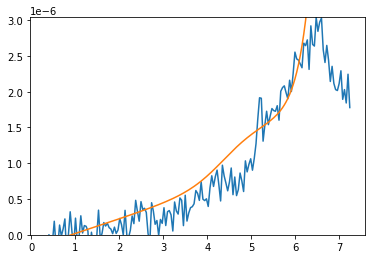

fileN:303,BE9P6AMIHD.json
Sigma
S=18.47,Phi=4.22,K0=3.65,Con=1.23e-06,cap=2.89e-05,Vcrit=3.08


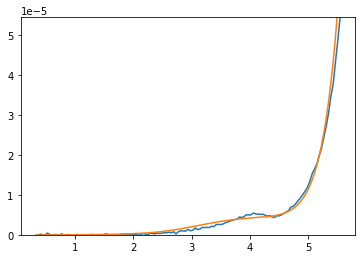

fileN:304,BEK2UY61WS.json
flat
fileN:305,BH4DTYQ7W1.json
flat
fileN:306,BH9JNVN6FL.json
flat
fileN:307,BHO0VIA74J.json
Sigma
fileN:308,BJFTS0Z19P.json
fileN:309,BJINLTWB90.json
flat
fileN:310,BLOO4EI43V.json
Sigma
fileN:311,BPBRWN1D19.json
S=23.14,Phi=4.22,K0=3.64,1.78e-07,-1.51e-07


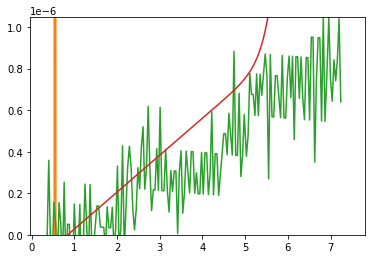

fileN:312,BQ5BT7LLI9.json
flat
fileN:313,BQG7Q7V5TN.json
Sigma
S=15.58,Phi=4.19,K0=3.64,Con=7.57e-07,cap=2.80e-05,Vcrit=2.27


c:\pythonproj\tfgpu\lib\site-packages\numpy\core\_methods.py:233: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
c:\pythonproj\tfgpu\lib\site-packages\numpy\core\_methods.py:194: RuntimeWarning: invalid value encountered in true_divide
  arrmean = um.true_divide(
c:\pythonproj\tfgpu\lib\site-packages\numpy\core\_methods.py:226: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


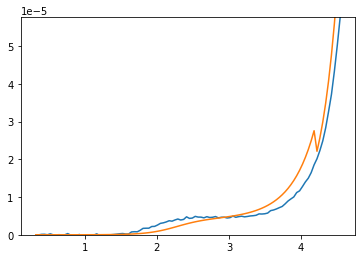

fileN:314,BRE2GR2OA8.json
Sigma
S=23.74,Phi=4.27,K0=3.70,Con=9.73e-07,cap=2.86e-05,Vcrit=3.44


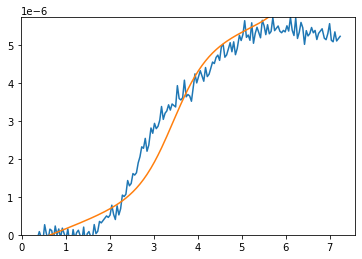

fileN:315,BRKMG7UOOF.json
flat
fileN:316,BS5OU07EOC.json
Sigma
fileN:317,BSGUFEAEVJ.json
fileN:318,BTVTKITMUG.json
fileN:319,BWAXL805UZ.json
S=15.00,Phi=4.18,K0=3.65,-1.78e-07,1.39e-07


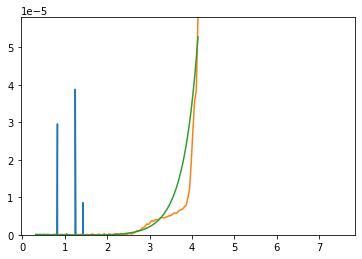

fileN:320,BWB9RKIN0Y.json
Sigma
S=23.78,Phi=4.27,K0=3.70,Con=1.67e-06,cap=2.83e-05,Vcrit=2.61


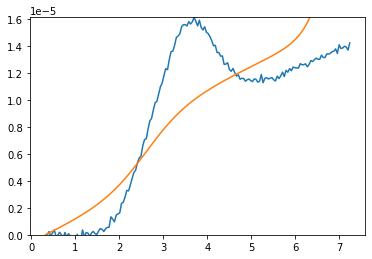

fileN:321,BY8Q1RDDVF.json
fileN:322,C0UPKUG3PJ.json
flat
fileN:323,C15CEZEULV.json
fileN:324,C28O2LSJQ1.json
flat
fileN:325,C2SAVLI0QW.json
fileN:326,C3F212AADJ.json
flat
fileN:327,C4CRR7EWO1.json
Sigma
fileN:328,C5OA8NESBR.json
fileN:329,C69WDKCJZL.json
Sigma
fileN:330,C71NZLF34U.json
flat
fileN:331,C74FA0FXVE.json
S=23.13,Phi=4.22,K0=3.64,-2.19e-07,1.30e-07


<ipython-input-9-41611301a7aa>:35: RuntimeWarning: divide by zero encountered in double_scalars
  stdR=np.std(y)/std


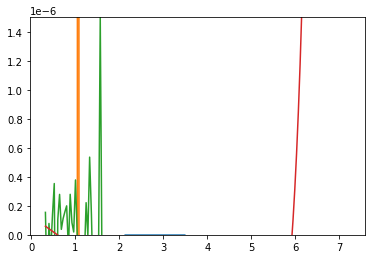

fileN:332,C78XA1ESK8.json
fileN:333,C7TSBJNXGG.json
flat
fileN:334,C8DLQA0F4M.json
fileN:335,C9UU028QR0.json
flat
fileN:336,CATMU5FU9L.json
fileN:337,CBQNA3ZETR.json
flat
fileN:338,CCLK2OQAJV.json


c:\pythonproj\tfgpu\lib\site-packages\numpy\core\_methods.py:233: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
c:\pythonproj\tfgpu\lib\site-packages\numpy\core\_methods.py:194: RuntimeWarning: invalid value encountered in true_divide
  arrmean = um.true_divide(
c:\pythonproj\tfgpu\lib\site-packages\numpy\core\_methods.py:226: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


fileN:339,CCZYARYCJY.json
flat
fileN:340,CD52FOK81Y.json
flat
fileN:341,CENNSZXKZG.json
fileN:342,CF5X87A600.json
fileN:343,CFZP6RJQGO.json
fileN:344,CGMGD34CRV.json
S=23.14,Phi=4.22,K0=3.64,-7.83e-08,3.41e-08


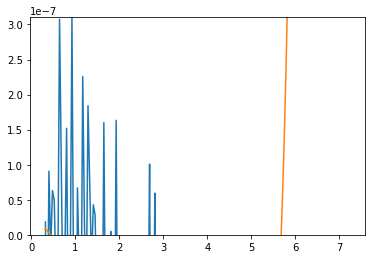

fileN:345,CGVBO51M8D.json
flat
fileN:346,CH8ST5OCNC.json
flat
fileN:347,CILUNUQ0SE.json
Sigma
S=16.15,Phi=4.21,K0=3.63,Con=-1.27e-07,cap=2.88e-05,Vcrit=2.39

c:\pythonproj\tfgpu\lib\site-packages\numpy\core\_methods.py:233: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
c:\pythonproj\tfgpu\lib\site-packages\numpy\core\_methods.py:194: RuntimeWarning: invalid value encountered in true_divide
  arrmean = um.true_divide(
c:\pythonproj\tfgpu\lib\site-packages\numpy\core\_methods.py:226: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


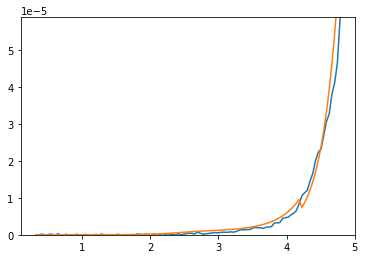

fileN:348,CIWZ4HW5WE.json
fileN:349,CJLSVN2FT1.json
flat
fileN:350,CKA4TMY4NX.json
flat
fileN:351,CKGL3YGPQ1.json
Sigma
S=14.93,Phi=4.20,K0=3.73,Con=1.34e-07,cap=2.85e-05,Vcrit=2.11


c:\pythonproj\tfgpu\lib\site-packages\numpy\core\_methods.py:233: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
c:\pythonproj\tfgpu\lib\site-packages\numpy\core\_methods.py:194: RuntimeWarning: invalid value encountered in true_divide
  arrmean = um.true_divide(
c:\pythonproj\tfgpu\lib\site-packages\numpy\core\_methods.py:226: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


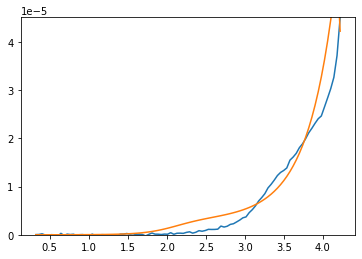

fileN:352,CL2E48QB7W.json
flat
fileN:353,CLDKNSYCSX.json
Sigma
S=23.79,Phi=4.28,K0=3.70,Con=1.03e-06,cap=2.96e-05,Vcrit=3.37


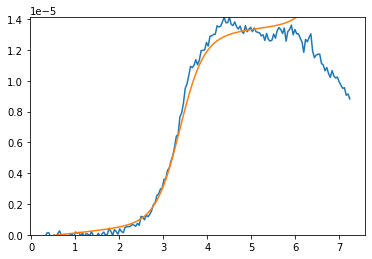

fileN:354,CS6RE5YQ27.json
Sigma
S=23.70,Phi=4.27,K0=3.70,Con=8.78e-08,cap=2.73e-05,Vcrit=3.92


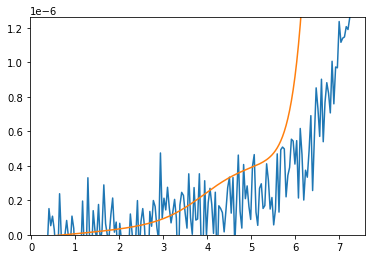

fileN:355,CWF1VP0HJT.json
fileN:356,CXA7JLFAWV.json
flat
fileN:357,CXJPYM0OTB.json
Sigma
fileN:358,CYD7UXQN6J.json
fileN:359,CZ2LK2V56C.json
flat
fileN:360,CZAKOD1DG0.json
fileN:361,D00PS95YIZ.json
Sigma
S=23.79,Phi=4.27,K0=3.70,Con=1.49e-06,cap=2.97e-05,Vcrit=2.99


<ipython-input-9-41611301a7aa>:35: RuntimeWarning: divide by zero encountered in double_scalars
  stdR=np.std(y)/std


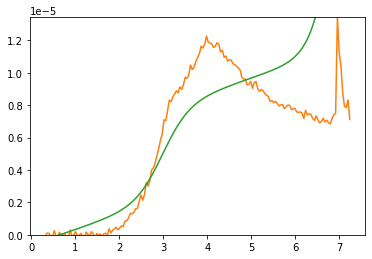

fileN:362,D0SO1WLXH4.json
fileN:363,D1AJPMYUIK.json
flat
fileN:364,D1SP9EBEY8.json
flat
fileN:365,D2IF6OFNYZ.json
fileN:366,D4E1JWGUZY.json
flat
fileN:367,D5K8YJ10Q4.json
flat
fileN:368,D6COQN2KXN.json
fileN:369,D6H0S8787Z.json
flat
fileN:370,D7KUWXJFOL.json
fileN:371,D7LJUB6UHX.json
Sigma
fileN:372,D8J47CF7XE.json
Sigma
fileN:373,DBECQU1CS5.json
S=16.63,Phi=4.25,K0=3.64,4.51e-06,-3.33e-06


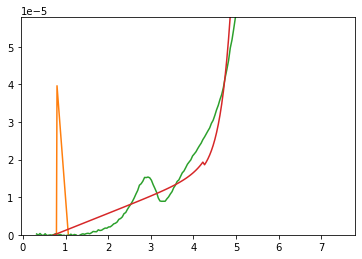

fileN:374,DBIOI6WH8Y.json
fileN:375,DBS70YFG85.json
fileN:376,DCJUK9P184.json
fileN:377,DHESCB6JFZ.json
flat
fileN:378,DJ53KNFRGW.json
Sigma
fileN:379,DLJ4IXDM2U.json
fileN:380,DLNX9GCXR6.json
fileN:381,DMPGB2QSBR.json
fileN:382,DPDLJUJWTY.json
fileN:383,DPPN1G1A6R.json
flat
fileN:384,DQK8J77ECK.json
fileN:385,DRCGJDQG02.json
fileN:386,DROP8BH4IM.json
fileN:387,DST86NU1GM.json
fileN:388,DTF6FPKAOK.json
S=15.45,Phi=4.09,K0=3.73,4.38e-07,-3.15e-07


c:\pythonproj\tfgpu\lib\site-packages\numpy\core\_methods.py:233: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
c:\pythonproj\tfgpu\lib\site-packages\numpy\core\_methods.py:194: RuntimeWarning: invalid value encountered in true_divide
  arrmean = um.true_divide(
c:\pythonproj\tfgpu\lib\site-packages\numpy\core\_methods.py:226: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


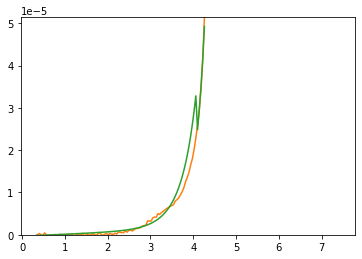

fileN:389,DU7OOUFUW7.json
fileN:390,DUQ2ADAQ9Y.json
Sigma
S=14.30,Phi=4.30,K0=3.70,Con=3.19e-06,cap=1.87e-05,Vcrit=2.05


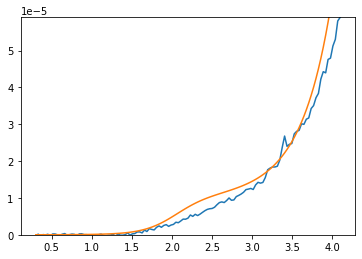

fileN:391,DV7GO5F5J4.json
flat
fileN:392,DW0E25MRX2.json
flat
fileN:393,DWO85L5L6B.json
fileN:394,DY956F6UKA.json
fileN:395,DYJII3QJ7D.json
fileN:396,DYJZPJJ0ER.json
flat
fileN:397,E0GSIDR4W9.json
Sigma
S=23.80,Phi=4.27,K0=3.70,Con=1.51e-06,cap=2.96e-05,Vcrit=2.98


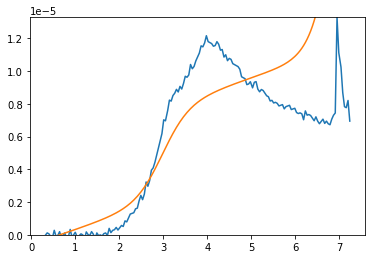

fileN:398,E0S1RR29C6.json
fileN:399,E1LFL7WWDO.json
S=23.13,Phi=4.22,K0=3.64,1.46e-07,-1.42e-07


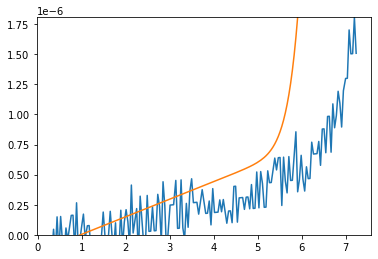

fileN:400,E211KC4160.json
fileN:401,E2MTYSXIKS.json
fileN:402,E3A9GADNC2.json
flat
fileN:403,E516TDSG5F.json
fileN:404,E59Z7HSJ6X.json
fileN:405,E5U71X0HNF.json
Sigma
S=18.24,Phi=4.22,K0=3.71,Con=2.44e-06,cap=2.44e-05,Vcrit=3.45


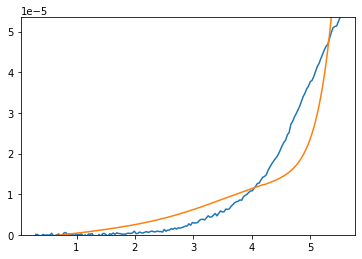

fileN:406,E7THCAAHRX.json
fileN:407,EB4Y0B8N8X.json
fileN:408,EE545ZNAJP.json
Sigma
S=23.60,Phi=4.26,K0=3.68,Con=1.06e-06,cap=2.97e-05,Vcrit=3.41


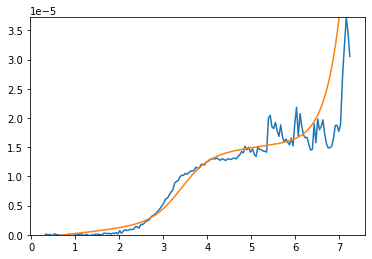

fileN:409,EEV04J8ICG.json
flat
fileN:410,EFB2J6R8FS.json
flat
fileN:411,EFBTBM5PDL.json
Sigma
fileN:412,EG5EK9XD02.json
fileN:413,EH0OPNSGPU.json
flat
fileN:414,EJV5Z1UVK5.json
fileN:415,EL1Y2PND6I.json
Sigma
fileN:416,EL4NPPOCX0.json
fileN:417,EMVK78MK9Q.json
flat
fileN:418,EOC6YM8WMM.json
Sigma
S=23.71,Phi=4.27,K0=3.70,Con=-3.43e-08,cap=2.89e-05,Vcrit=3.86


<ipython-input-9-41611301a7aa>:35: RuntimeWarning: divide by zero encountered in double_scalars
  stdR=np.std(y)/std
c:\pythonproj\tfgpu\lib\site-packages\numpy\core\_methods.py:233: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
c:\pythonproj\tfgpu\lib\site-packages\numpy\core\_methods.py:194: RuntimeWarning: invalid value encountered in true_divide
  arrmean = um.true_divide(
c:\pythonproj\tfgpu\lib\site-packages\numpy\core\_methods.py:226: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


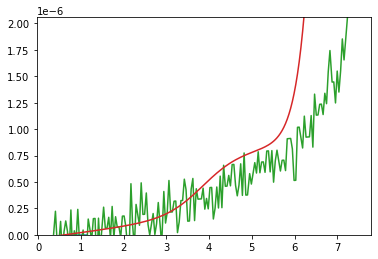

fileN:419,EOJ464BZG9.json
flat
fileN:420,ERCK0YVPU3.json
Sigma
S=17.72,Phi=4.22,K0=3.65,Con=1.14e-06,cap=2.94e-05,Vcrit=3.07


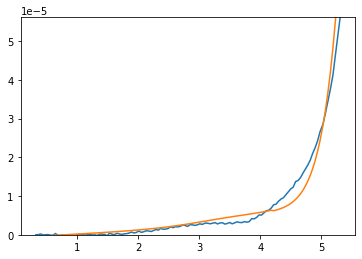

fileN:421,ES532KW51Y.json
Sigma
S=23.75,Phi=4.27,K0=3.70,Con=1.15e-06,cap=2.82e-05,Vcrit=3.18


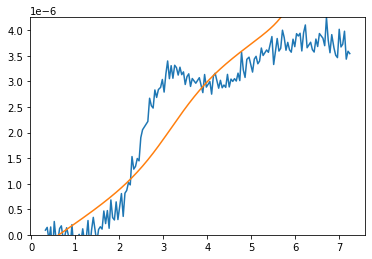

fileN:422,ESFBLIHOA2.json
fileN:423,EVXNRAIDUH.json
flat
fileN:424,EWA5THOZ3F.json
fileN:425,EWIF7QZW0M.json
flat
fileN:426,EZ6UYRVR8I.json
S=22.97,Phi=4.21,K0=3.64,4.29e-08,-3.86e-08


c:\pythonproj\tfgpu\lib\site-packages\numpy\core\_methods.py:233: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
c:\pythonproj\tfgpu\lib\site-packages\numpy\core\_methods.py:194: RuntimeWarning: invalid value encountered in true_divide
  arrmean = um.true_divide(
c:\pythonproj\tfgpu\lib\site-packages\numpy\core\_methods.py:226: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


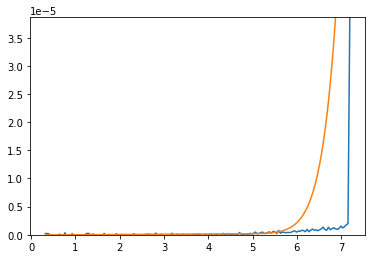

fileN:427,F0AW13MCKE.json
fileN:428,F2MY1G0D36.json
fileN:429,F4WQ878EOJ.json
flat
fileN:430,F5ZMEOE2P1.json
flat
fileN:431,F63KCQ4MYO.json
fileN:432,F8YFWK5SIZ.json
fileN:433,FF5JOBWXQD.json
fileN:434,FGDGW8E2Y4.json

c:\pythonproj\tfgpu\lib\site-packages\numpy\core\_methods.py:233: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
c:\pythonproj\tfgpu\lib\site-packages\numpy\core\_methods.py:194: RuntimeWarning: invalid value encountered in true_divide
  arrmean = um.true_divide(
c:\pythonproj\tfgpu\lib\site-packages\numpy\core\_methods.py:226: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)



fileN:435,FGP96LMWKW.json
fileN:436,FJC2YDXHEP.json
flat
fileN:437,FKGF14KRLL.json
fileN:438,FKKS19BJYJ.json
fileN:439,FKUG2GRGSA.json
fileN:440,FLJSBVGO2G.json
flat
fileN:441,FMIC568IOV.json
Sigma
S=23.77,Phi=4.27,K0=3.70,Con=8.90e-07,cap=2.84e-05,Vcrit=2.95


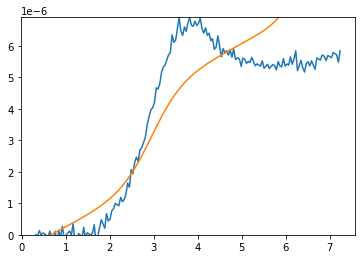

fileN:442,FRMRTXNHYY.json
fileN:443,FU3S1USDUW.json
fileN:444,FUNHBX385K.json
flat
fileN:445,FUQLMK5AG9.json
flat
fileN:446,FVK1KQZ3GU.json
fileN:447,FY09ZQEWV5.json
fileN:448,G4E7R5HL46.json
Sigma
S=14.17,Phi=4.31,K0=3.71,Con=-6.79e-09,cap=2.86e-05,Vcrit=2.05


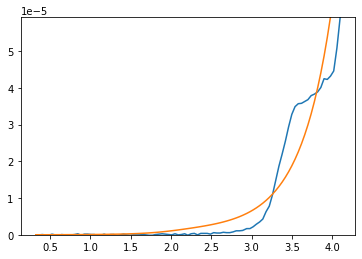

fileN:449,G4FU0EWNWM.json
fileN:450,G5RZ5YWYT5.json
fileN:451,G5YUCIMDUD.json
fileN:452,G6JNBJZ0SV.json
fileN:453,G6N3OVXZFZ.json
fileN:454,G7RPC5THXE.json
fileN:455,G8J5UD01WB.json
flat
fileN:456,G9TBS65EY0.json
Sigma
S=19.89,Phi=4.22,K0=3.65,Con=1.76e-07,cap=2.97e-05,Vcrit=3.04


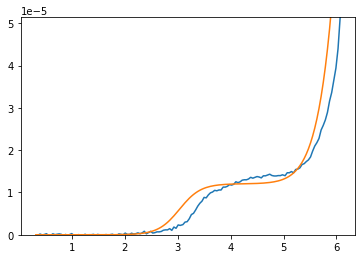

fileN:457,GAA4YNXR7P.json
Sigma
S=23.72,Phi=4.27,K0=3.70,Con=-8.85e-08,cap=2.85e-05,Vcrit=3.76


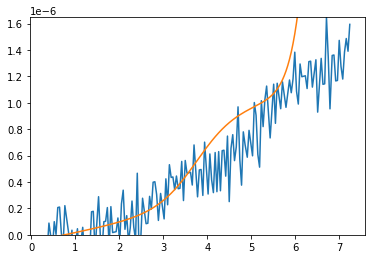

fileN:458,GASE743YOP.json
Sigma
S=17.73,Phi=4.22,K0=3.66,Con=1.27e-06,cap=2.85e-05,Vcrit=2.83


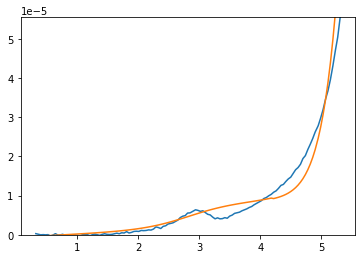

fileN:459,GBA7J8LLS8.json
fileN:460,GF8ACTN8K2.json
S=23.12,Phi=4.22,K0=3.64,3.90e-08,-6.04e-08


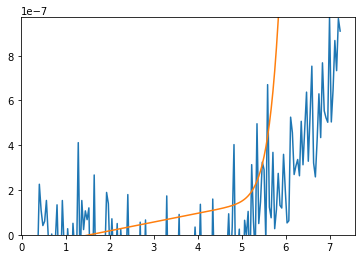

fileN:461,GFSYEQ3GSH.json
fileN:462,GGDJ9I7SR9.json
fileN:463,GGO0THAX0J.json
flat
fileN:464,GIYKA7LUQ1.json
fileN:465,GK8XH586XI.json
flat
fileN:466,GM8Z3VRJX4.json
flat
fileN:467,GPL91AYZA0.json
Sigma
S=23.65,Phi=4.26,K0=3.68,Con=2.25e-07,cap=3.00e-05,Vcrit=3.11


c:\pythonproj\tfgpu\lib\site-packages\numpy\core\_methods.py:233: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
c:\pythonproj\tfgpu\lib\site-packages\numpy\core\_methods.py:194: RuntimeWarning: invalid value encountered in true_divide
  arrmean = um.true_divide(
c:\pythonproj\tfgpu\lib\site-packages\numpy\core\_methods.py:226: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
<ipython-input-9-41611301a7aa>:35: RuntimeWarning: divide by zero encountered in double_scalars
  stdR=np.std(y)/std


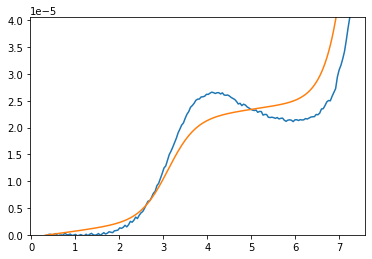

fileN:468,GR6XKGKZZ4.json
Sigma
S=19.11,Phi=4.21,K0=3.63,Con=1.01e-06,cap=2.85e-05,Vcrit=2.91


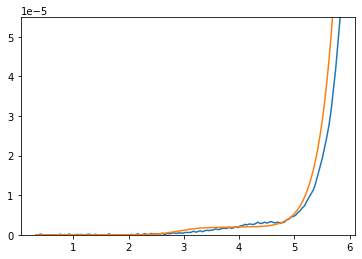

fileN:469,GS6U0I4UIP.json
flat
fileN:470,GUPAQYZE72.json
Sigma
fileN:471,GYELKL7VAN.json
flat
fileN:472,GZ50GBBWFS.json
flat
fileN:473,GZXDLTEPAC.json
flat
fileN:474,H04ZCWX35Q.json
Sigma
S=23.70,Phi=4.27,K0=3.70,Con=7.98e-08,cap=3.00e-05,Vcrit=3.80


c:\pythonproj\tfgpu\lib\site-packages\numpy\core\_methods.py:233: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
c:\pythonproj\tfgpu\lib\site-packages\numpy\core\_methods.py:194: RuntimeWarning: invalid value encountered in true_divide
  arrmean = um.true_divide(
c:\pythonproj\tfgpu\lib\site-packages\numpy\core\_methods.py:226: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


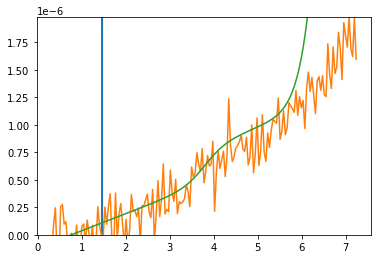

fileN:475,H0MQLCM8GT.json
fileN:476,H23SUV4LNZ.json
S=23.15,Phi=4.22,K0=3.64,-8.09e-07,5.98e-07


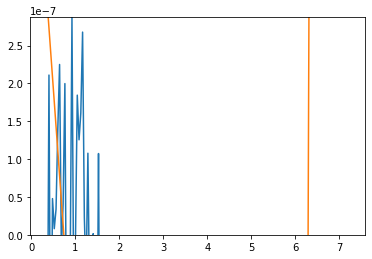

fileN:477,H26R67BHQT.json
fileN:478,H2IMBOCFYF.json
flat
fileN:479,H3A2R7R14K.json
fileN:480,H58GNZUDDB.json
fileN:481,H59UX7NDLD.json
fileN:482,H64LOR94H8.json
fileN:483,H6GBEB58KK.json
Sigma
S=18.84,Phi=4.20,K0=3.64,Con=3.39e-06,cap=2.81e-05,Vcrit=2.87


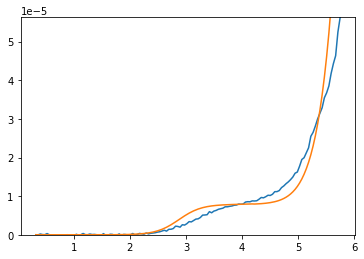

fileN:484,H6WUCBEXKD.json
flat
fileN:485,H9PPBR5OMD.json
fileN:486,H9RNNCZMPR.json
fileN:487,HAAKVTTFCW.json
fileN:488,HE9LX8QF1B.json
Sigma
S=23.73,Phi=4.27,K0=3.70,Con=-1.58e-09,cap=2.74e-05,Vcrit=3.70


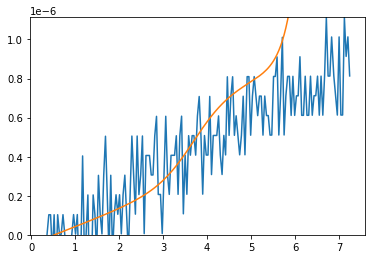

fileN:489,HH6QZ9WC7X.json
fileN:490,HJKNYIKCU1.json
flat
fileN:491,HKKUY4UZ7A.json
flat
fileN:492,HLI94ZSB5W.json
fileN:493,HN1NCUZM5I.json
flat
fileN:494,HN6CPX4JFX.json
fileN:495,HOFWGQXZH4.json
fileN:496,HP6H2GXLQV.json
fileN:497,HSDPJO9ALT.json
fileN:498,HSNKP1KSVN.json
flat
fileN:499,HYLUY6FS6B.json
Sigma
S=23.70,Phi=4.27,K0=3.70,Con=1.09e-07,cap=2.90e-05,Vcrit=3.91


c:\pythonproj\tfgpu\lib\site-packages\numpy\core\_methods.py:233: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
c:\pythonproj\tfgpu\lib\site-packages\numpy\core\_methods.py:194: RuntimeWarning: invalid value encountered in true_divide
  arrmean = um.true_divide(
c:\pythonproj\tfgpu\lib\site-packages\numpy\core\_methods.py:226: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


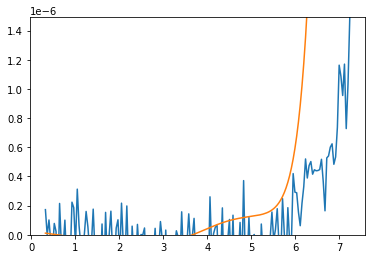

fileN:500,HZRUJIH82Q.json
fileN:501,I0ZAV6YFM5.json
fileN:502,I25I7W7KTJ.json
fileN:503,I3HN6283MH.json
Sigma
S=14.22,Phi=4.35,K0=3.75,Con=2.85e-06,cap=1.92e-05,Vcrit=2.17


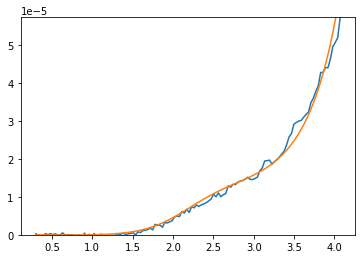

fileN:504,I4N9LEOFWI.json
fileN:505,I4VH3QARPB.json
fileN:506,I8E4BXG7S8.json
fileN:507,I8GK8S3VEJ.json
flat
fileN:508,I91EK5SES1.json
flat
fileN:509,ICD8UYVZMK.json
flat
fileN:510,ICKPVQCV88.json
flat
fileN:511,IEIRDXXRSJ.json
fileN:512,IH3G5OO261.json
Sigma
S=14.28,Phi=4.30,K0=3.71,Con=8.54e-07,cap=2.93e-05,Vcrit=2.14


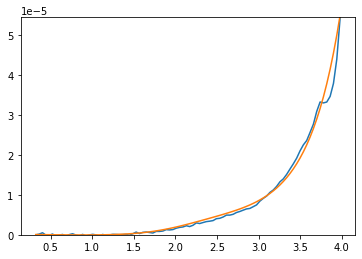

fileN:513,IH90A083X5.json
Sigma
fileN:514,IIA98A5IDL.json
flat
fileN:515,IJ8HUKSAVS.json
Sigma
S=23.74,Phi=4.27,K0=3.70,Con=8.45e-07,cap=2.82e-05,Vcrit=3.40


c:\pythonproj\tfgpu\lib\site-packages\numpy\core\_methods.py:233: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
c:\pythonproj\tfgpu\lib\site-packages\numpy\core\_methods.py:194: RuntimeWarning: invalid value encountered in true_divide
  arrmean = um.true_divide(
c:\pythonproj\tfgpu\lib\site-packages\numpy\core\_methods.py:226: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


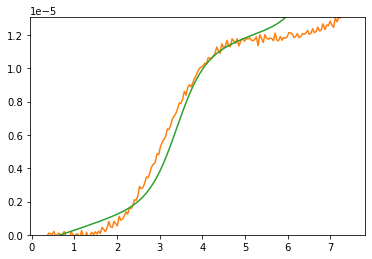

fileN:516,IKPWFD1RR8.json
flat
fileN:517,IL8DGG2ZN5.json
Sigma
S=18.18,Phi=4.22,K0=3.69,Con=1.02e-06,cap=2.84e-05,Vcrit=3.79


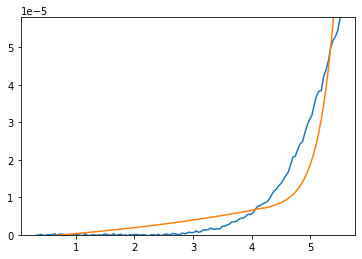

fileN:518,IMDWZJAXSK.json
flat
fileN:519,IMPER1KJHZ.json
flat
fileN:520,IN7KVLZYS0.json
S=15.32,Phi=4.19,K0=3.62,-1.57e-06,1.22e-06


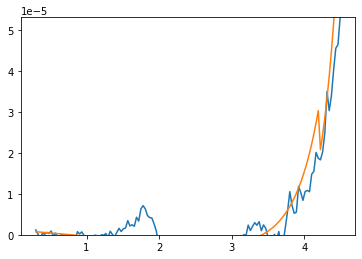

fileN:521,IN7X72B8DK.json
fileN:522,INMIWWKSOG.json
fileN:523,INXN9YCQ6F.json
flat
fileN:524,IPHB5D95F5.json
flat
fileN:525,IPNB9S61BV.json
S=23.14,Phi=4.22,K0=3.64,-1.47e-07,7.92e-08


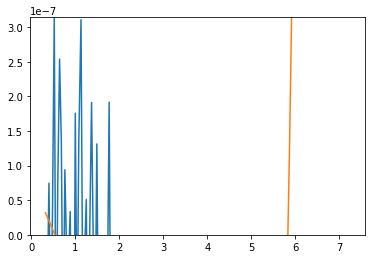

fileN:526,IQAK46KA1Q.json
Sigma
S=23.71,Phi=4.27,K0=3.70,Con=-2.83e-07,cap=2.84e-05,Vcrit=3.79


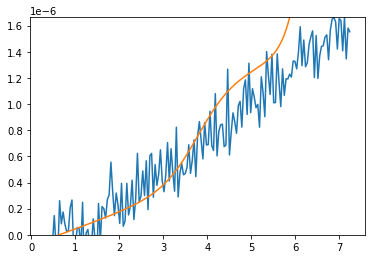

fileN:527,IQQ2YDZ199.json
flat
fileN:528,IUNSR766HP.json
flat
fileN:529,IVME7V6Z4M.json
flat
fileN:530,IW4F5EDJZ4.json
Sigma
S=23.71,Phi=4.27,K0=3.70,Con=-2.03e-08,cap=2.72e-05,Vcrit=3.83


c:\pythonproj\tfgpu\lib\site-packages\numpy\core\_methods.py:233: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
c:\pythonproj\tfgpu\lib\site-packages\numpy\core\_methods.py:194: RuntimeWarning: invalid value encountered in true_divide
  arrmean = um.true_divide(
c:\pythonproj\tfgpu\lib\site-packages\numpy\core\_methods.py:226: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


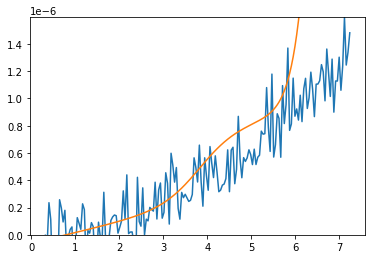

fileN:531,J31RNM5IPC.json
flat
fileN:532,J4VYIIO90D.json
Sigma
S=18.21,Phi=4.22,K0=3.65,Con=1.16e-06,cap=2.87e-05,Vcrit=3.16


c:\pythonproj\tfgpu\lib\site-packages\numpy\core\_methods.py:233: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
c:\pythonproj\tfgpu\lib\site-packages\numpy\core\_methods.py:194: RuntimeWarning: invalid value encountered in true_divide
  arrmean = um.true_divide(
c:\pythonproj\tfgpu\lib\site-packages\numpy\core\_methods.py:226: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


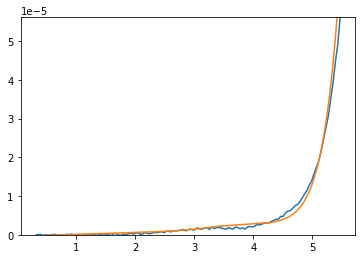

fileN:533,J50BDGLIKT.json
Sigma
S=23.72,Phi=4.27,K0=3.70,Con=-2.98e-07,cap=2.85e-05,Vcrit=3.66


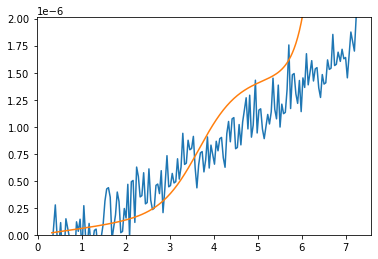

fileN:534,J5HFMIWM7X.json
Sigma
S=23.71,Phi=4.27,K0=3.70,Con=-2.46e-07,cap=2.85e-05,Vcrit=3.68


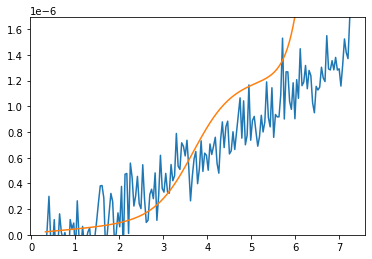

fileN:535,J7XXDPDU1N.json
Sigma
S=23.61,Phi=4.26,K0=3.70,Con=4.27e-07,cap=2.82e-05,Vcrit=3.84


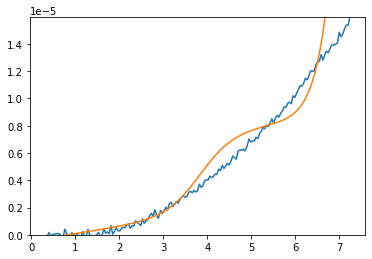

fileN:536,J8LHXSNSKV.json
fileN:537,JA9PB2FGQ0.json
fileN:538,JAGIM4WN05.json
Sigma
S=23.61,Phi=4.26,K0=3.70,Con=1.44e+28,cap=9.91e+43,Vcrit=3.84


<ipython-input-9-41611301a7aa>:35: RuntimeWarning: divide by zero encountered in double_scalars
  stdR=np.std(y)/std
<ipython-input-14-9e241a68c336>:85: UserWarning: Attempting to set identical bottom == top == 0 results in singular transformations; automatically expanding.
  plt.ylim([0,np.max(y)])


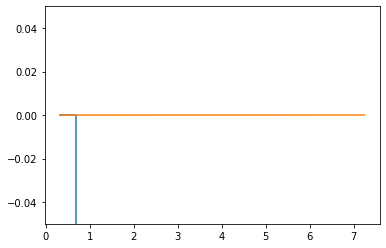

fileN:539,JB5DM5LQ2O.json
S=11.72,Phi=4.94,K0=3.83,-1.00e-04,-1.00e-04


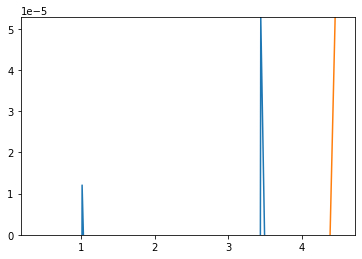

fileN:540,JBAZW9X7GF.json
fileN:541,JC74LP7HSS.json
flat
fileN:542,JEY691JS6Q.json
fileN:543,JEZXSXFM84.json
Sigma
S=23.71,Phi=4.27,K0=3.70,Con=1.26e-07,cap=2.72e-05,Vcrit=4.50


<ipython-input-9-41611301a7aa>:35: RuntimeWarning: divide by zero encountered in double_scalars
  stdR=np.std(y)/std


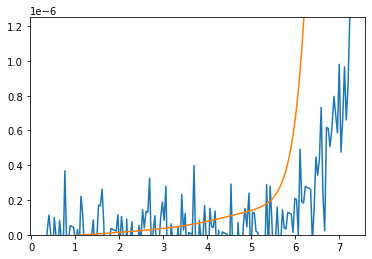

fileN:544,JF4CPZDG8P.json
fileN:545,JFZ9ZE0XNM.json
flat
fileN:546,JKB88ZW4JA.json
fileN:547,JKM2V6VPQZ.json
flat
fileN:548,JKP5AZ32IM.json
flat
fileN:549,JMLE2M5JV4.json
fileN:550,JN6LJ644OK.json
flat
fileN:551,JOJ617ZPIH.json
Sigma
S=23.71,Phi=4.27,K0=3.70,Con=1.19e-07,cap=2.87e-05,Vcrit=4.23


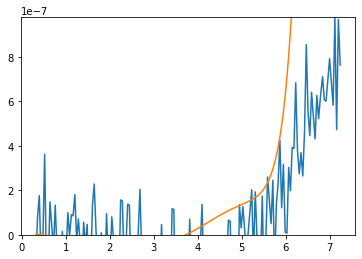

fileN:552,JOMJ8B8I0S.json
flat
fileN:553,JQEC736LL6.json
Sigma
fileN:554,JS8DZBPAYL.json
fileN:555,JSMOOOIPP0.json
fileN:556,JW3OCEEB9W.json
fileN:557,JWADJO3EH9.json
fileN:558,JXBZGQJEL5.json
fileN:559,K0HV029OCA.json
fileN:560,K3SZ4Q9S4C.json
fileN:561,K40VRBF0XW.json
flat
fileN:562,K4PA3OSKBJ.json
flat
fileN:563,K5F5V3OCQM.json
fileN:564,K9807BKOMB.json
flat
fileN:565,KAGOQUMXI9.json
Sigma
S=17.94,Phi=4.22,K0=3.66,Con=1.10e-06,cap=2.96e-05,Vcrit=2.88


<ipython-input-9-41611301a7aa>:35: RuntimeWarning: divide by zero encountered in double_scalars
  stdR=np.std(y)/std


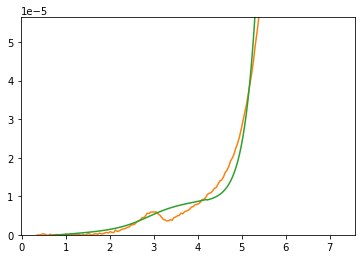

fileN:566,KAHM17SXAG.json
fileN:567,KDG0UCBWR6.json
fileN:568,KEGN5Z0AGK.json
Sigma
fileN:569,KFAYS6P65M.json
flat
fileN:570,KFBUKHR1K9.json
fileN:571,KFYDTZGF6Z.json
fileN:572,KGFXR6EJAR.json
Sigma
S=23.70,Phi=4.27,K0=3.70,Con=-3.44e-08,cap=2.97e-05,Vcrit=4.26


c:\pythonproj\tfgpu\lib\site-packages\numpy\core\_methods.py:233: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
c:\pythonproj\tfgpu\lib\site-packages\numpy\core\_methods.py:194: RuntimeWarning: invalid value encountered in true_divide
  arrmean = um.true_divide(
c:\pythonproj\tfgpu\lib\site-packages\numpy\core\_methods.py:226: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


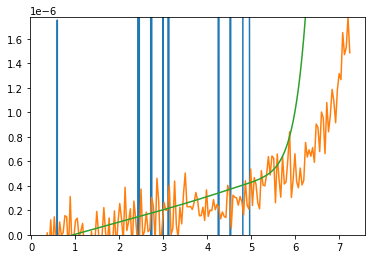

fileN:573,KHMHZ4IKKA.json
flat
fileN:574,KI3MY6ZQVI.json
fileN:575,KIU86K9AJD.json
Sigma
fileN:576,KJBU2Y0JIM.json
Sigma
fileN:577,KJYKNKLMW5.json
fileN:578,KKA7DT3KIH.json
flat
fileN:579,KKFUY2GVZY.json
fileN:580,KKMW3OIUMW.json
Sigma
S=23.73,Phi=4.27,K0=3.70,Con=8.07e-07,cap=2.81e-05,Vcrit=3.30


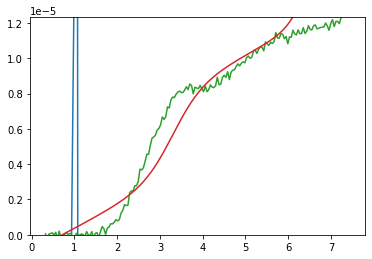

fileN:581,KPSWE6WWSJ.json
flat
fileN:582,KPZUFMIMD4.json
fileN:583,KSLZCH6FJ9.json
Sigma
S=23.72,Phi=4.27,K0=3.70,Con=-8.42e-09,cap=2.72e-05,Vcrit=3.89


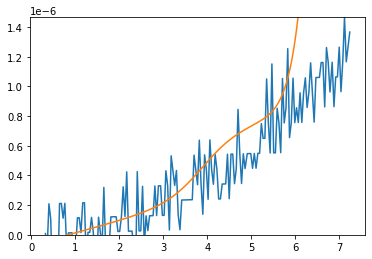

fileN:584,KTUELHYU53.json
fileN:585,KU425I408T.json
fileN:586,KUIRBIBQAV.json
fileN:587,KUTD4CXAFS.json
flat
fileN:588,KWNT3G9D15.json
Sigma
fileN:589,L0NVIH8QO3.json
Sigma
fileN:590,L0X49V2PYH.json
flat
fileN:591,L2H5T318W6.json
fileN:592,L42E4ENQGC.json
fileN:593,L5LMVFXRBN.json
fileN:594,L76QDZZUR9.json
fileN:595,L8SKLE54ZC.json
fileN:596,L9UOP4ZRLG.json
fileN:597,LAD7PYJ6KO.json
Sigma
S=23.70,Phi=4.27,K0=3.70,Con=-7.31e-08,cap=2.98e-05,Vcrit=4.05


c:\pythonproj\tfgpu\lib\site-packages\numpy\core\_methods.py:233: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
c:\pythonproj\tfgpu\lib\site-packages\numpy\core\_methods.py:194: RuntimeWarning: invalid value encountered in true_divide
  arrmean = um.true_divide(
c:\pythonproj\tfgpu\lib\site-packages\numpy\core\_methods.py:226: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
c:\pythonproj\tfgpu\lib\site-packages\numpy\core\_methods.py:233: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
c:\pythonproj\tfgpu\lib\site-packages\numpy\core\_methods.py:194: RuntimeWarning: invalid value encountered in true_divide
  arrmean = um.true_divide(
c:\pythonproj\tfgpu\lib\site-packages\numpy\core\_methods.py:226: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
<ipython-input-9-416

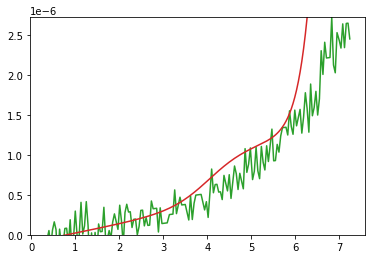

fileN:598,LC8JI4IJ0D.json
flat
fileN:599,LD1FR3BQVC.json
S=15.35,Phi=4.31,K0=3.60,2.02e-06,-1.63e-06


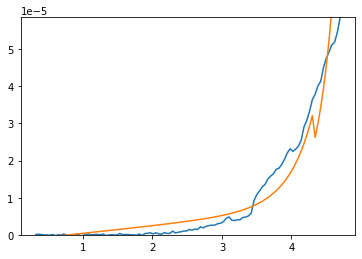

fileN:600,LDLNT3GGSY.json
Sigma
S=16.14,Phi=4.21,K0=3.63,Con=-1.56e-07,cap=2.88e-05,Vcrit=2.39


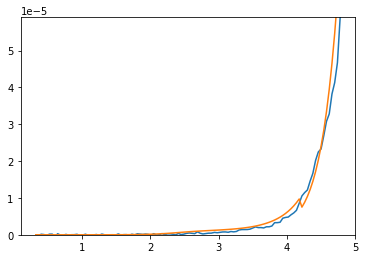

fileN:601,LFG8X5V0DX.json
fileN:602,LHOIJYBHF1.json
Sigma
S=17.74,Phi=4.22,K0=3.65,Con=-1.03e-07,cap=2.96e-05,Vcrit=3.19


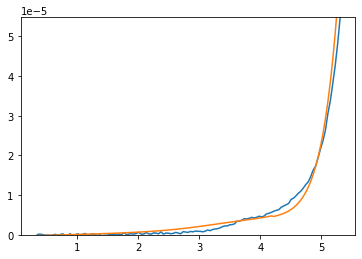

fileN:603,LIRBFI7ZNA.json
flat
fileN:604,LM50T7W4VS.json
flat
fileN:605,LMH67LPYKJ.json
fileN:606,LMPAVX6I4Z.json
fileN:607,LNPIAJ008T.json
fileN:608,LOXPR3IV08.json
Sigma
S=23.70,Phi=4.27,K0=3.70,Con=-5.03e-08,cap=2.84e-05,Vcrit=3.83


c:\pythonproj\tfgpu\lib\site-packages\numpy\core\_methods.py:233: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
c:\pythonproj\tfgpu\lib\site-packages\numpy\core\_methods.py:194: RuntimeWarning: invalid value encountered in true_divide
  arrmean = um.true_divide(
c:\pythonproj\tfgpu\lib\site-packages\numpy\core\_methods.py:226: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


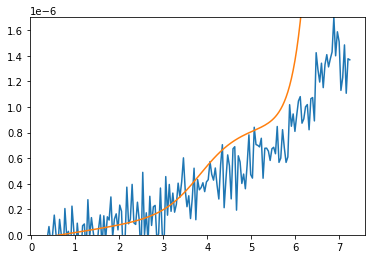

fileN:609,LPKRQVHXT1.json
flat
fileN:610,LREEIK4OPM.json
Sigma
S=18.79,Phi=4.20,K0=3.63,Con=-2.22e-08,cap=2.96e-05,Vcrit=2.87


c:\pythonproj\tfgpu\lib\site-packages\numpy\core\_methods.py:233: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
c:\pythonproj\tfgpu\lib\site-packages\numpy\core\_methods.py:194: RuntimeWarning: invalid value encountered in true_divide
  arrmean = um.true_divide(
c:\pythonproj\tfgpu\lib\site-packages\numpy\core\_methods.py:226: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


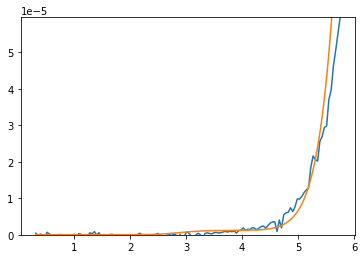

fileN:611,LS0F33CDWQ.json
flat
fileN:612,LTG2IBSOZV.json
flat
fileN:613,LTTI92O6WF.json
S=23.13,Phi=4.22,K0=3.64,1.40e-07,-1.34e-07


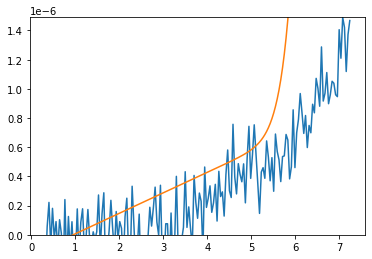

fileN:614,LU9P6DMFFK.json
Sigma
fileN:615,LWLY89ZPEY.json
flat
fileN:616,LX2G7GKKLC.json
Sigma
S=23.71,Phi=4.27,K0=3.70,Con=-7.11e-08,cap=2.85e-05,Vcrit=3.78


<ipython-input-9-41611301a7aa>:35: RuntimeWarning: divide by zero encountered in double_scalars
  stdR=np.std(y)/std


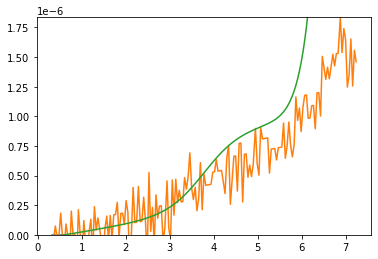

fileN:617,LYKWDJVJKM.json
flat
fileN:618,LZPPTDJ0WL.json
fileN:619,M175VZVKBS.json
Sigma
S=23.71,Phi=4.27,K0=3.70,Con=8.05e-09,cap=2.88e-05,Vcrit=3.89


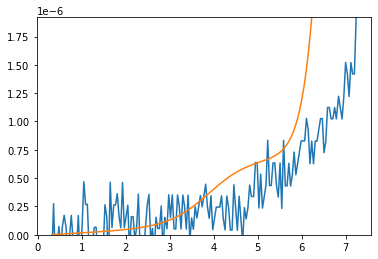

fileN:620,M1FN9T0KK8.json
fileN:621,M3NBMYFDLM.json
fileN:622,M4F7HJL072.json
fileN:623,M6COEMFY7H.json
fileN:624,M6IEI992P0.json
Sigma
S=17.90,Phi=4.24,K0=3.68,Con=6.80e-08,cap=2.86e-05,Vcrit=5.27


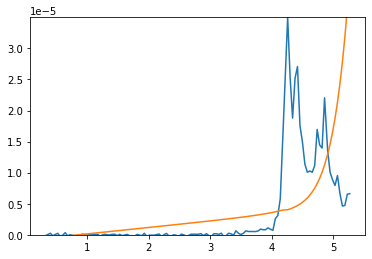

fileN:625,M6YC1T2C1M.json
flat
fileN:626,M77ZQIODOH.json
Sigma
fileN:627,M7ME41I8ZA.json
flat
fileN:628,M88ADYPAGL.json
fileN:629,M9ERAX5JB9.json
Sigma
S=23.70,Phi=4.27,K0=3.70,Con=-6.69e-08,cap=2.98e-05,Vcrit=3.91


c:\pythonproj\tfgpu\lib\site-packages\numpy\core\_methods.py:233: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
c:\pythonproj\tfgpu\lib\site-packages\numpy\core\_methods.py:194: RuntimeWarning: invalid value encountered in true_divide
  arrmean = um.true_divide(
c:\pythonproj\tfgpu\lib\site-packages\numpy\core\_methods.py:226: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


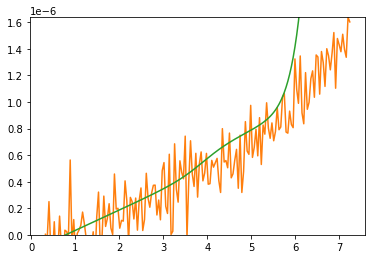

fileN:630,MCHYFMM3QA.json
Sigma
S=23.77,Phi=4.27,K0=3.70,Con=1.47e-06,cap=2.93e-05,Vcrit=3.32


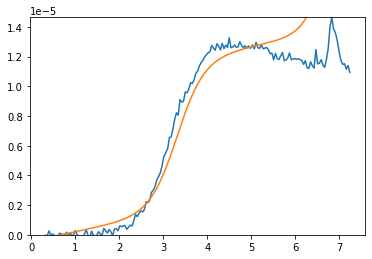

fileN:631,MF6BUUE7E9.json
Sigma
S=23.74,Phi=4.27,K0=3.70,Con=1.81e-06,cap=2.83e-05,Vcrit=3.08


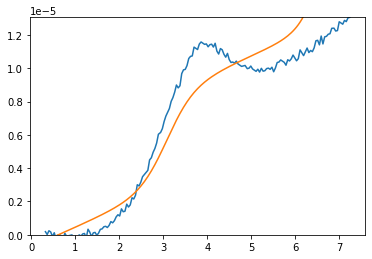

fileN:632,MG8V0FBV34.json
fileN:633,MJA3P0AGNW.json
fileN:634,MK7XZTFWF7.json
fileN:635,MO2UIGHO46.json
flat
fileN:636,MPVTI96LBI.json
fileN:637,MQ3IR6FLNT.json
fileN:638,MRBQGOYJGD.json
Sigma
fileN:639,MRBWSM7BI6.json
fileN:640,MRX7XH1HUW.json
fileN:641,MTI0RYT2GW.json
fileN:642,MTKF8PZ3QI.json
fileN:643,MTQ5VQVY3P.json
flat
fileN:644,MUA41WD2OG.json
fileN:645,MUYQ2QBTDE.json
fileN:646,MWFEFADIML.json
Sigma
fileN:647,MYTQQDXR6I.json
flat
fileN:648,MZIBVFNGSZ.json
fileN:649,MZTP62NATC.json
S=23.13,Phi=4.22,K0=3.64,-1.55e-07,8.20e-08


<ipython-input-9-41611301a7aa>:35: RuntimeWarning: divide by zero encountered in double_scalars
  stdR=np.std(y)/std


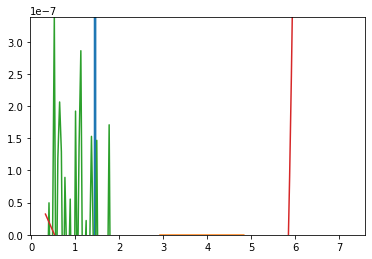

fileN:650,MZUVVR7C8P.json
Sigma
S=16.49,Phi=4.21,K0=3.63,Con=1.91e-06,cap=2.79e-05,Vcrit=2.45


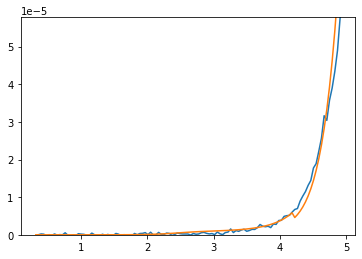

fileN:651,N0BE6QHO5X.json
fileN:652,N0M1MZGLK6.json
fileN:653,N1AVDV4O23.json
fileN:654,N1H35DDBOM.json
fileN:655,N1SQQUMH70.json
fileN:656,N201Z3C13O.json
Sigma
S=23.69,Phi=4.27,K0=3.70,Con=-9.47e-08,cap=2.98e-05,Vcrit=4.03


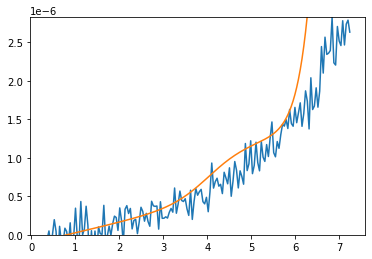

fileN:657,N6H60TZV9S.json
fileN:658,N6LXLHHJSZ.json
flat
fileN:659,N7E8Q38VHA.json
flat
fileN:660,N8IRUORUM1.json
fileN:661,N8X9IWAXMC.json
Sigma
S=23.96,Phi=4.29,K0=3.71,Con=3.10e-06,cap=2.75e-05,Vcrit=2.08


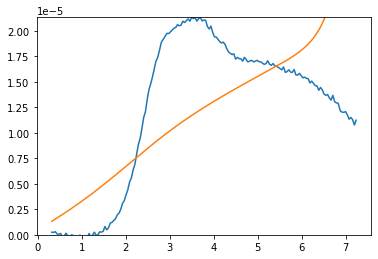

fileN:662,N9KQ8MSADS.json
fileN:663,N9VH5TCUJJ.json
fileN:664,NBF11CTGAH.json
flat
fileN:665,NCDXH9PEV4.json
fileN:666,NCGLOUQHOS.json
Sigma
S=23.73,Phi=4.27,K0=3.70,Con=8.25e-07,cap=2.82e-05,Vcrit=3.40


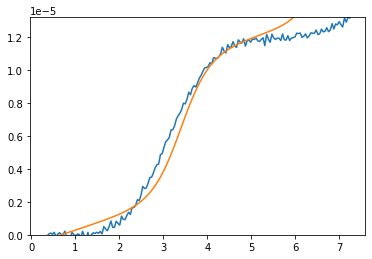

fileN:667,NCSC80A5YM.json
fileN:668,ND5X4F3BYQ.json
fileN:669,NDO6GK5VJN.json
fileN:670,NDXZH5GGSQ.json
fileN:671,NDY5A0TJT3.json
fileN:672,NFFZYQHVW8.json
Sigma
S=23.81,Phi=4.28,K0=3.70,Con=1.02e-06,cap=2.96e-05,Vcrit=3.38


<ipython-input-9-41611301a7aa>:35: RuntimeWarning: divide by zero encountered in double_scalars
  stdR=np.std(y)/std


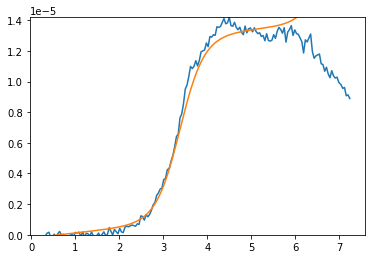

fileN:673,NFIIOOKX90.json
flat
fileN:674,NHPEKV54T5.json
fileN:675,NIQLL1B130.json
fileN:676,NLSJSJHZT1.json
fileN:677,NM2MS4MTE3.json
flat
fileN:678,NN68AVN44T.json
fileN:679,NNHRJ6FB3L.json
Sigma
fileN:680,NPW8JKK5YK.json
fileN:681,NQ13RB5QDW.json
Sigma
S=23.76,Phi=4.27,K0=3.70,Con=8.65e-07,cap=2.86e-05,Vcrit=3.20


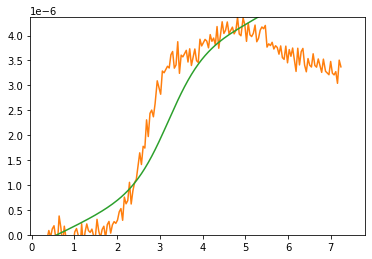

fileN:682,NQSSFR40YT.json
flat
fileN:683,NSBCI4180I.json
fileN:684,NT00RAA5BB.json
fileN:685,NTHV9ISSKF.json
flat
fileN:686,NTN3XT0XV6.json
Sigma
S=19.46,Phi=4.21,K0=3.64,Con=-6.75e-08,cap=3.00e-05,Vcrit=2.98


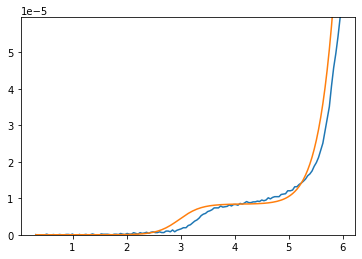

fileN:687,NV26L0U9JK.json
flat
fileN:688,NWVFGK63GQ.json
Sigma
S=23.65,Phi=4.26,K0=3.69,Con=6.09e-08,cap=2.87e-05,Vcrit=3.84


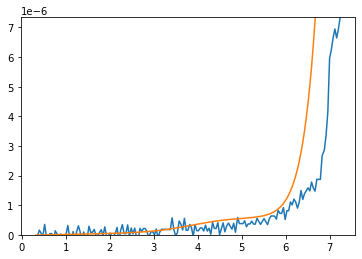

fileN:689,O0GAR1DCZF.json
S=23.13,Phi=4.22,K0=3.64,1.82e-07,-1.56e-07


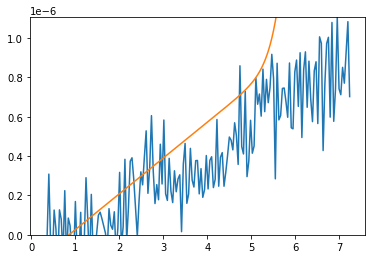

fileN:690,O1GIL6NBAH.json
fileN:691,O3N5X8CWM7.json
Sigma
S=23.65,Phi=4.26,K0=3.69,Con=7.48e-04,cap=6.16e-04,Vcrit=3.84


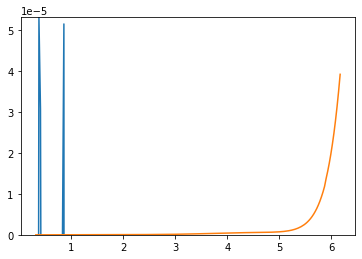

fileN:692,O3SRDKF4IR.json
flat
fileN:693,O8IDMYVVQ8.json
flat
fileN:694,O8L58XX5ZY.json
S=19.96,Phi=4.16,K0=3.42,-1.00e-04,-1.00e-04


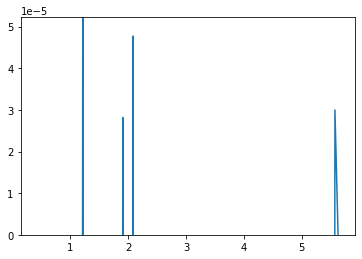

fileN:695,O99EZCVNPV.json
flat
fileN:696,OA5VSV3R8P.json
flat
fileN:697,OBN1GGXA83.json
fileN:698,OCMQ47U34L.json
fileN:699,OCZRPKV3AU.json
fileN:700,ODVHACRHO4.json
fileN:701,OEUDIIF4TY.json
flat
fileN:702,OFI91OWLEO.json
flat
fileN:703,OFVAQI46XP.json
Sigma
S=23.70,Phi=4.27,K0=3.70,Con=-6.94e-08,cap=2.98e-05,Vcrit=3.81


c:\pythonproj\tfgpu\lib\site-packages\numpy\core\_methods.py:233: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
c:\pythonproj\tfgpu\lib\site-packages\numpy\core\_methods.py:194: RuntimeWarning: invalid value encountered in true_divide
  arrmean = um.true_divide(
c:\pythonproj\tfgpu\lib\site-packages\numpy\core\_methods.py:226: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


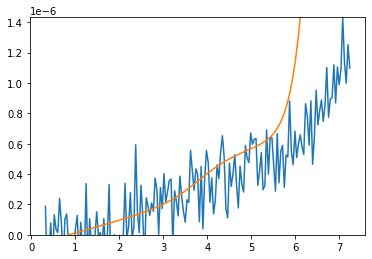

fileN:704,OGW8D5V4HQ.json
flat
fileN:705,OIKZJLN9OB.json
S=13.91,Phi=4.23,K0=3.67,-1.28e-06,8.19e-07


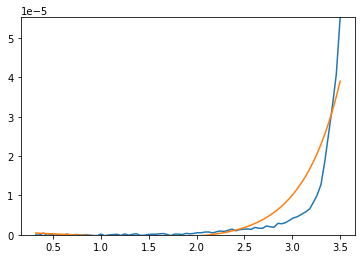

fileN:706,OINM71V7AQ.json
fileN:707,OIXUJFJCNO.json
flat
fileN:708,OM1DZGSDDD.json
flat
fileN:709,OMK8WJCEEN.json
fileN:710,ORF9XSNKN7.json
flat
fileN:711,OS37I7SGOC.json
fileN:712,OUTI9T9Q5G.json
Sigma
fileN:713,OUVZOK62W1.json
fileN:714,OVQ9QSBCDZ.json
fileN:715,OYIM7ZUJ4A.json
flat
fileN:716,OZXC3GX54C.json
flat
fileN:717,P0OXX17NL1.json
flat
fileN:718,P3OBMWE9JR.json
Sigma
S=14.17,Phi=4.31,K0=3.71,Con=3.30e-08,cap=2.86e-05,Vcrit=2.05


c:\pythonproj\tfgpu\lib\site-packages\numpy\core\_methods.py:233: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
c:\pythonproj\tfgpu\lib\site-packages\numpy\core\_methods.py:194: RuntimeWarning: invalid value encountered in true_divide
  arrmean = um.true_divide(
c:\pythonproj\tfgpu\lib\site-packages\numpy\core\_methods.py:226: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


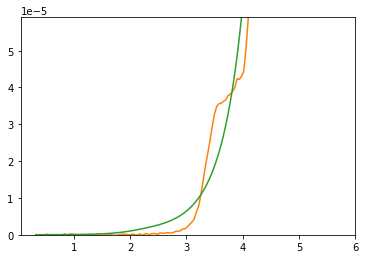

fileN:719,P45U413PQW.json
flat
fileN:720,P5D4LBCS6U.json
Sigma
fileN:721,P5UZ1FJF4S.json
fileN:722,P6T8WJUMNE.json
fileN:723,P96ZR5TANJ.json
flat
fileN:724,P99EYPYSJF.json
Sigma
fileN:725,P9TZYYURVN.json


<ipython-input-9-41611301a7aa>:35: RuntimeWarning: divide by zero encountered in double_scalars
  stdR=np.std(y)/std
c:\pythonproj\tfgpu\lib\site-packages\numpy\core\_methods.py:233: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
c:\pythonproj\tfgpu\lib\site-packages\numpy\core\_methods.py:194: RuntimeWarning: invalid value encountered in true_divide
  arrmean = um.true_divide(
c:\pythonproj\tfgpu\lib\site-packages\numpy\core\_methods.py:226: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


flat
fileN:726,P9UGFL3I2S.json
Sigma
fileN:727,PBOT043X9X.json
fileN:728,PBTC256Y55.json
Sigma
S=15.81,Phi=4.02,K0=3.75,Con=3.59e-08,cap=2.95e-05,Vcrit=1.76


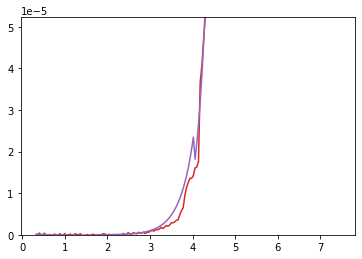

c:\pythonproj\tfgpu\lib\site-packages\numpy\core\_methods.py:233: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
c:\pythonproj\tfgpu\lib\site-packages\numpy\core\_methods.py:194: RuntimeWarning: invalid value encountered in true_divide
  arrmean = um.true_divide(
c:\pythonproj\tfgpu\lib\site-packages\numpy\core\_methods.py:226: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


fileN:729,PC7AEUM8KA.json
flat
fileN:730,PE3PLHF1SG.json
flat
fileN:731,PFDGYX2DI9.json
flat
fileN:732,PGI3F3Z7KO.json
flat
fileN:733,PGLFAF9Z38.json
fileN:734,PH7FPXY6MW.json
Sigma
S=17.80,Phi=4.22,K0=3.67,Con=9.73e-07,cap=2.94e-05,Vcrit=2.66


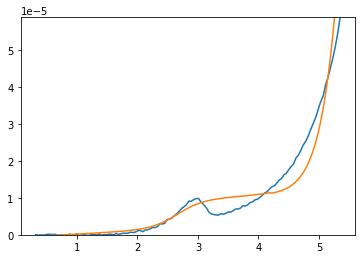

fileN:735,PHDCPY63ZI.json
Sigma
S=19.89,Phi=4.22,K0=3.65,Con=2.05e-07,cap=2.97e-05,Vcrit=3.04


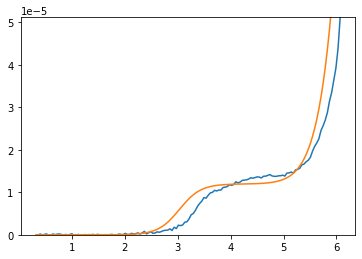

fileN:736,PHK8XEV9O0.json
flat
fileN:737,PJIU8W6M0L.json
fileN:738,PJTDWT31SF.json
Sigma
S=23.70,Phi=4.27,K0=3.70,Con=3.05e-09,cap=2.88e-05,Vcrit=3.94


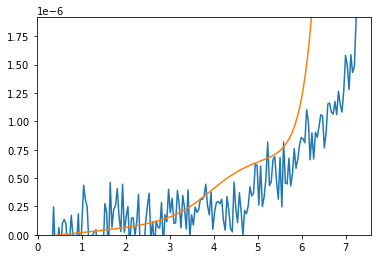

fileN:739,PM0KF3MTQ1.json
flat
fileN:740,PNWLRQMVUS.json
fileN:741,POF3RSD958.json
fileN:742,PPY8JONN3S.json
fileN:743,PQ3TYJ2436.json
fileN:744,PQD1FGVDUH.json
S=15.88,Phi=4.22,K0=3.65,-1.99e-07,1.18e-07


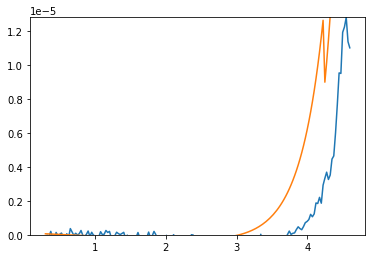

fileN:745,PRRWF940I8.json
Sigma
S=23.70,Phi=4.27,K0=3.70,Con=1.27e+28,cap=9.91e+43,Vcrit=3.94


<ipython-input-9-41611301a7aa>:35: RuntimeWarning: divide by zero encountered in double_scalars
  stdR=np.std(y)/std
<ipython-input-14-9e241a68c336>:85: UserWarning: Attempting to set identical bottom == top == 0 results in singular transformations; automatically expanding.
  plt.ylim([0,np.max(y)])


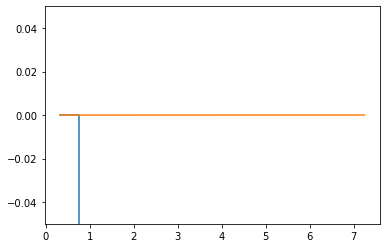

fileN:746,PTE07FLGOL.json
flat
fileN:747,PTJZ8CH4PB.json
Sigma
S=23.70,Phi=4.27,K0=3.70,Con=1.18e-07,cap=2.87e-05,Vcrit=4.21


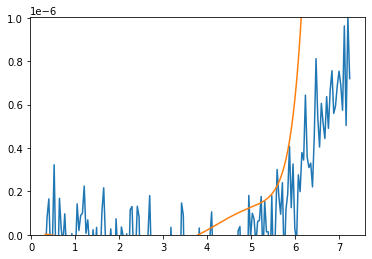

fileN:748,PY7FVYY1S4.json
Sigma
S=17.71,Phi=4.22,K0=3.65,Con=1.12e-06,cap=2.95e-05,Vcrit=3.05


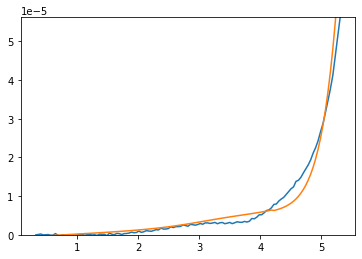

fileN:749,PZTN10EF42.json
fileN:750,Q026I3M31T.json
Sigma
fileN:751,Q0I6V32K37.json
Sigma
fileN:752,Q1SCY1IO9J.json
flat
fileN:753,Q2MS6BN8MG.json
Sigma
S=18.47,Phi=4.22,K0=3.65,Con=1.23e-06,cap=2.89e-05,Vcrit=3.09


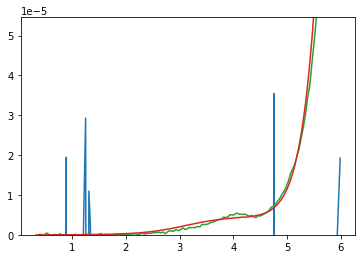

fileN:754,Q6B3SDAOC7.json
Sigma
fileN:755,QAEJP5OXHQ.json
flat
fileN:756,QBOK9IE46C.json
flat
fileN:757,QCAR00C5F1.json
fileN:758,QF4M8N7JBZ.json
fileN:759,QFJMEILF0I.json
flat
fileN:760,QFSPDWIEFT.json
Sigma
fileN:761,QIWKIOLA7X.json
fileN:762,QNJN0N7LTQ.json
fileN:763,QNQZXZN6I8.json
fileN:764,QO6IDR0IDE.json
fileN:765,QOTXHV11U6.json
fileN:766,QQ62N96FC7.json
fileN:767,QQECUDJ9GS.json
flat
fileN:768,QR7VIANRL4.json
flat
fileN:769,QRIV2TPV6F.json
flat
fileN:770,QRUKW9CPVC.json
Sigma
fileN:771,QWC7BHDG8B.json
Sigma
fileN:772,QWK7DZCSLB.json
flat
fileN:773,QX4AXXJO3M.json
Sigma
S=20.24,Phi=4.22,K0=3.65,Con=-2.01e-07,cap=2.86e-05,Vcrit=3.10


c:\pythonproj\tfgpu\lib\site-packages\numpy\core\_methods.py:233: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
c:\pythonproj\tfgpu\lib\site-packages\numpy\core\_methods.py:194: RuntimeWarning: invalid value encountered in true_divide
  arrmean = um.true_divide(
c:\pythonproj\tfgpu\lib\site-packages\numpy\core\_methods.py:226: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
<ipython-input-9-41611301a7aa>:35: RuntimeWarning: invalid value encountered in double_scalars
  stdR=np.std(y)/std
<ipython-input-9-41611301a7aa>:35: RuntimeWarning: divide by zero encountered in double_scalars
  stdR=np.std(y)/std
<ipython-input-9-41611301a7aa>:35: RuntimeWarning: divide by zero encountered in double_scalars
  stdR=np.std(y)/std


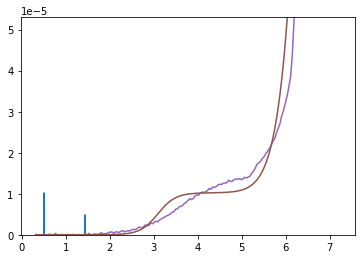

fileN:774,R036MLWT71.json
flat
fileN:775,R0DDCS3FT7.json
fileN:776,R1DI5CBARZ.json
fileN:777,R1GFBV6U3A.json
flat
fileN:778,R508YXEAS2.json
fileN:779,R526PF62T3.json
Sigma
S=23.71,Phi=4.27,K0=3.70,Con=-1.42e-07,cap=2.87e-05,Vcrit=3.76


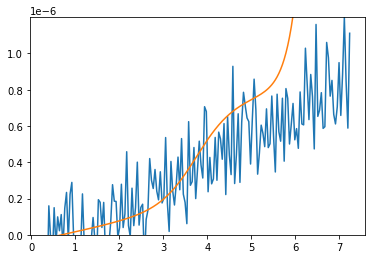

fileN:780,R8F2QYOBV1.json
flat
fileN:781,RB55OQHWMI.json
fileN:782,RCKRCNCC4M.json
Sigma
S=16.49,Phi=4.21,K0=3.63,Con=1.91e-06,cap=2.79e-05,Vcrit=2.45


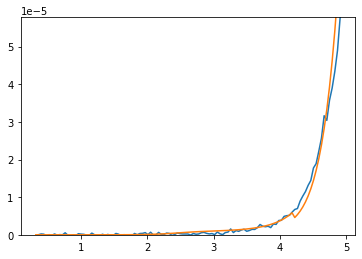

fileN:783,RD4S5MJVBN.json
fileN:784,RDJ7ADTSVX.json
Sigma
S=23.69,Phi=4.27,K0=3.70,Con=-8.29e-08,cap=2.97e-05,Vcrit=3.94


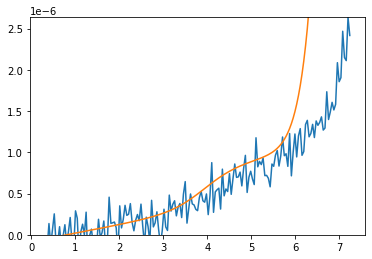

fileN:785,RDRH0GTAIN.json
fileN:786,RFSHL4D3H8.json
Sigma
S=23.74,Phi=4.27,K0=3.70,Con=8.87e-07,cap=2.83e-05,Vcrit=3.41


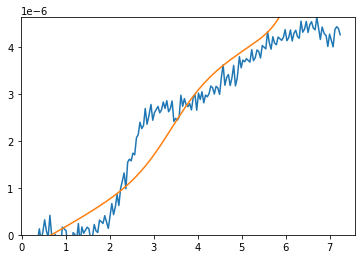

fileN:787,RH1LK1CS4U.json
Sigma
fileN:788,RHMZNPD8MC.json
fileN:789,RIWCAPP6B4.json
flat
fileN:790,RKMQ5YT5P3.json
fileN:791,RL0M8X2X52.json
flat
fileN:792,RLUXT8IZ2C.json
fileN:793,RM21DV5DVI.json
Sigma
S=23.71,Phi=4.27,K0=3.70,Con=4.36e-08,cap=2.75e-05,Vcrit=4.08


c:\pythonproj\tfgpu\lib\site-packages\numpy\core\_methods.py:233: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
c:\pythonproj\tfgpu\lib\site-packages\numpy\core\_methods.py:194: RuntimeWarning: invalid value encountered in true_divide
  arrmean = um.true_divide(
c:\pythonproj\tfgpu\lib\site-packages\numpy\core\_methods.py:226: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


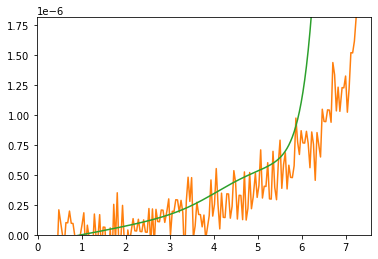

fileN:794,RO1W9EHCO8.json
flat
fileN:795,ROXB8XO068.json
fileN:796,RP6CFGQGFS.json
flat
fileN:797,RQ9XPIC6J0.json
flat
fileN:798,RRH4WOAMZ6.json
flat
fileN:799,RS7NHNC71P.json
fileN:800,RT4YKRS7VK.json
flat
fileN:801,RTII7HBV4S.json
flat
fileN:802,RU6YGWZ0B7.json
flat
fileN:803,RUVXCBDZ1E.json
Sigma
S=23.60,Phi=4.26,K0=3.70,Con=4.19e-07,cap=2.82e-05,Vcrit=3.83


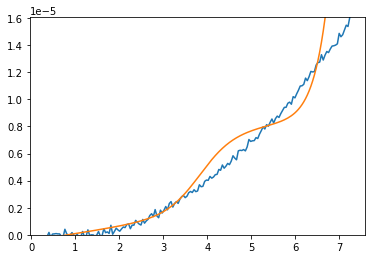

fileN:804,RVO6NTEENC.json
flat
fileN:805,RW8W5KAEW6.json
flat
fileN:806,RW9VOLWRZP.json
Sigma
S=23.73,Phi=4.27,K0=3.70,Con=8.99e-07,cap=2.83e-05,Vcrit=3.39


<ipython-input-9-41611301a7aa>:35: RuntimeWarning: invalid value encountered in double_scalars
  stdR=np.std(y)/std


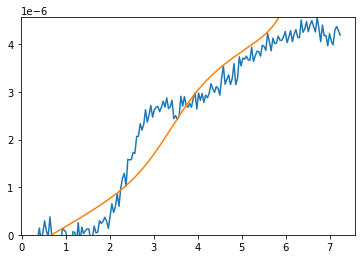

fileN:807,RYE2953BDJ.json
fileN:808,S0B8NFB80R.json
fileN:809,S0PK7N56RB.json
Sigma
S=23.79,Phi=4.27,K0=3.70,Con=1.67e-06,cap=2.83e-05,Vcrit=2.61


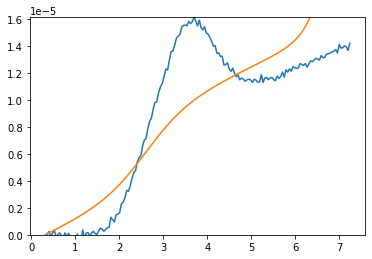

fileN:810,S1GYP0NYXY.json
flat
fileN:811,S3QUXS1YP1.json
Sigma
fileN:812,S5TG8SIMFU.json
Sigma
S=23.48,Phi=4.25,K0=3.68,Con=9.25e-07,cap=2.86e-05,Vcrit=2.13


<ipython-input-9-41611301a7aa>:35: RuntimeWarning: divide by zero encountered in double_scalars
  stdR=np.std(y)/std


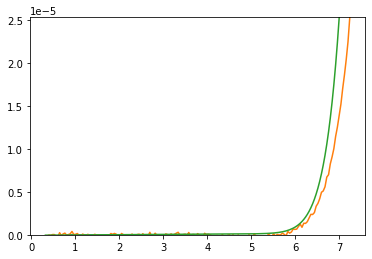

fileN:813,S6EOXSYHWT.json
flat
fileN:814,SC1GH86B48.json
Sigma
S=23.70,Phi=4.27,K0=3.70,Con=-1.94e-08,cap=2.89e-05,Vcrit=3.90


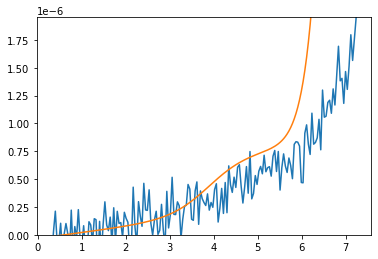

fileN:815,SC5BDDUQ9S.json
S=15.36,Phi=4.31,K0=3.60,2.03e-06,-1.64e-06


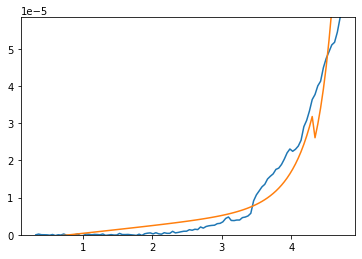

fileN:816,SCSWIHM75N.json
flat
fileN:817,SCTVQKM80L.json
Sigma
fileN:818,SD335EBAE5.json
flat
fileN:819,SET5M7FQ6G.json
fileN:820,SEVT0KHCE2.json
fileN:821,SHA8WJV8LL.json
fileN:822,SHHLDINEJ1.json
fileN:823,SHZ2FRVXEB.json
Sigma
S=23.73,Phi=4.27,K0=3.70,Con=1.81e-06,cap=2.83e-05,Vcrit=3.09


c:\pythonproj\tfgpu\lib\site-packages\numpy\core\_methods.py:233: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
c:\pythonproj\tfgpu\lib\site-packages\numpy\core\_methods.py:194: RuntimeWarning: invalid value encountered in true_divide
  arrmean = um.true_divide(
c:\pythonproj\tfgpu\lib\site-packages\numpy\core\_methods.py:226: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
c:\pythonproj\tfgpu\lib\site-packages\numpy\core\_methods.py:233: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
c:\pythonproj\tfgpu\lib\site-packages\numpy\core\_methods.py:194: RuntimeWarning: invalid value encountered in true_divide
  arrmean = um.true_divide(
c:\pythonproj\tfgpu\lib\site-packages\numpy\core\_methods.py:226: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


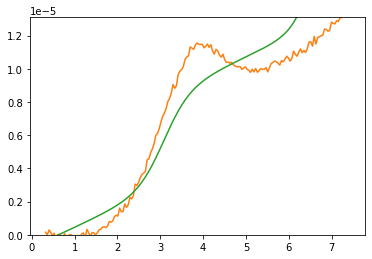

fileN:824,SJJJV3HYC8.json
fileN:825,SN42FG6YEN.json
fileN:826,SON7C6M0J4.json
fileN:827,SQJ4UZ5088.json
flat
fileN:828,SQV4LOX24C.json
fileN:829,SS7RM25WFU.json
flat
fileN:830,SSWT2P1L1K.json
fileN:831,STCT2CSIXS.json
flat
fileN:832,SUXVJVVDJ1.json
Sigma
S=17.72,Phi=4.22,K0=3.66,Con=1.28e-06,cap=2.85e-05,Vcrit=2.84


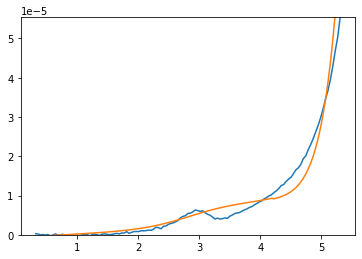

fileN:833,SWGT8CT3BJ.json
flat
fileN:834,SXL6VEAZ47.json
flat
fileN:835,SY1L6C7IMJ.json
fileN:836,SYT1EKP13S.json
fileN:837,SYYOIPWH58.json
fileN:838,T0JETIULC0.json
flat
fileN:839,T1LVZO3H9K.json
Sigma
S=23.71,Phi=4.27,K0=3.70,Con=-2.00e-07,cap=2.84e-05,Vcrit=3.71


<ipython-input-9-41611301a7aa>:35: RuntimeWarning: divide by zero encountered in double_scalars
  stdR=np.std(y)/std


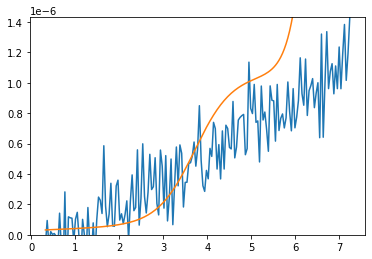

fileN:840,T1YJJDFOZ8.json
fileN:841,T2A4GT2Q6I.json
Sigma
fileN:842,T2TKWJE2OU.json
fileN:843,T5J4KZJAM8.json
flat
fileN:844,T5JMAWNNSM.json
fileN:845,T6YI7ZJOQQ.json
flat
fileN:846,T7SVZQHLUM.json
flat
fileN:847,T8JZHJ8P1C.json
fileN:848,T99CYJVP0C.json
fileN:849,T9QPBANJ7W.json
fileN:850,TBN1XM5QIW.json
fileN:851,TCDYC2IVUY.json
fileN:852,TE2R5NAOWP.json
flat
fileN:853,TFF10VCAZV.json
flat
fileN:854,TFN1SE11CM.json
fileN:855,TG9HQ04DWY.json
fileN:856,TI0R30VA3O.json
fileN:857,TJWCFH80PK.json
fileN:858,TK5DY22QOK.json
fileN:859,TL4DS0RNI1.json
fileN:860,TL6XUSZKGM.json
fileN:861,TLNPAQUTLI.json
Sigma
S=23.70,Phi=4.27,K0=3.70,Con=1.28e-07,cap=2.72e-05,Vcrit=4.92


<ipython-input-9-41611301a7aa>:35: RuntimeWarning: divide by zero encountered in double_scalars
  stdR=np.std(y)/std


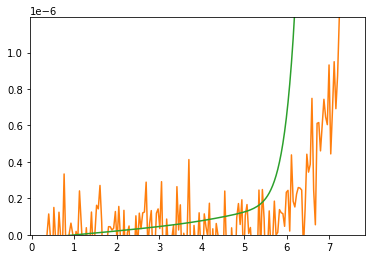

fileN:862,TMREXN3GIU.json
flat
fileN:863,TOZGLM5RNU.json
Sigma
S=23.70,Phi=4.27,K0=3.70,Con=1.39e+28,cap=9.91e+43,Vcrit=4.92


<ipython-input-9-41611301a7aa>:35: RuntimeWarning: divide by zero encountered in double_scalars
  stdR=np.std(y)/std
<ipython-input-14-9e241a68c336>:85: UserWarning: Attempting to set identical bottom == top == 0 results in singular transformations; automatically expanding.
  plt.ylim([0,np.max(y)])


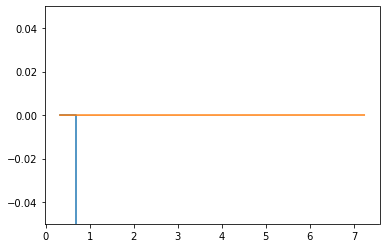

fileN:864,TRCOTWFOP2.json
Sigma
fileN:865,TSKEW13ICZ.json
Sigma
S=23.75,Phi=4.27,K0=3.70,Con=1.50e-06,cap=2.93e-05,Vcrit=3.31


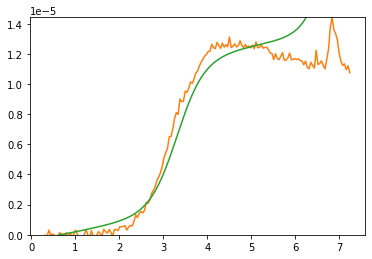

fileN:866,TVS3310I9W.json
fileN:867,TWRNLST2JQ.json
fileN:868,TYQF6GRID6.json
flat
fileN:869,U1CBQP9PCP.json
flat
fileN:870,U2H1IPUARS.json
flat
fileN:871,U9360TST5S.json
Sigma
fileN:872,UA176S3HAJ.json
flat
fileN:873,UC0KZY9X51.json
flat
fileN:874,UD9X87CX5N.json
fileN:875,UER86OJNRH.json
fileN:876,UFFJ3AYW0Y.json
flat
fileN:877,UFVS5TNKAA.json
fileN:878,UG6L1T2W5J.json
fileN:879,UHFCQ5MUJH.json
flat
fileN:880,UK24J92BHF.json
fileN:881,UKLTX5H2UP.json
Sigma
fileN:882,UL6P1L272P.json
fileN:883,UM4MFLWR5G.json
flat
fileN:884,UM7JM6UR6B.json
fileN:885,UM9518MRF3.json
S=15.65,Phi=4.18,K0=3.64,-4.77e-09,-2.04e-08


<ipython-input-9-41611301a7aa>:35: RuntimeWarning: divide by zero encountered in double_scalars
  stdR=np.std(y)/std
c:\pythonproj\tfgpu\lib\site-packages\numpy\core\_methods.py:233: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
c:\pythonproj\tfgpu\lib\site-packages\numpy\core\_methods.py:194: RuntimeWarning: invalid value encountered in true_divide
  arrmean = um.true_divide(
c:\pythonproj\tfgpu\lib\site-packages\numpy\core\_methods.py:226: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


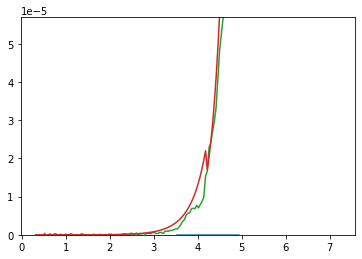

fileN:886,UN0KPZULEC.json
Sigma
S=16.70,Phi=4.24,K0=3.63,Con=6.32e-06,cap=2.08e-05,Vcrit=2.50


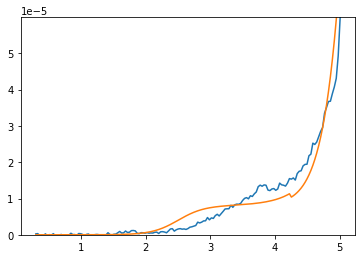

fileN:887,UN21ZXCE09.json
flat
fileN:888,UN80989TDZ.json
fileN:889,UNCWOHRDRM.json
fileN:890,UNOLKVPNIL.json
fileN:891,UOPE44O2BE.json
fileN:892,UR0L4GUZ00.json
Sigma
S=23.59,Phi=4.26,K0=3.70,Con=2.01e-06,cap=2.78e-05,Vcrit=3.91


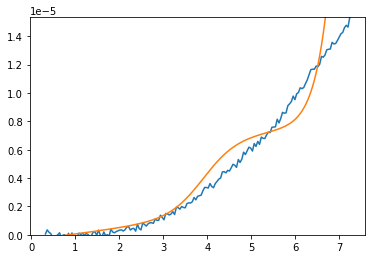

fileN:893,US4KQEDKMG.json
fileN:894,UV2WRQ3F1I.json
fileN:895,UWAYBNALWZ.json
fileN:896,UWXQI5NG21.json
flat
fileN:897,V02Z0SFTFW.json
fileN:898,V1ITS2GRHF.json
fileN:899,V228M7LYAH.json
flat
fileN:900,V2ZUQLWIXD.json
fileN:901,V7EUNF6DW3.json
Sigma
fileN:902,VAC4QUZ16U.json
fileN:903,VAQLKCOY4L.json
fileN:904,VDVX2HFZZ0.json
fileN:905,VFM043MNQE.json
flat
fileN:906,VGKF883UKH.json
fileN:907,VH44TGF5ES.json
Sigma
fileN:908,VHK827WVWT.json
fileN:909,VJ0O2CXO76.json
flat
fileN:910,VLEASJL5SU.json
fileN:911,VMQOI83I8N.json
fileN:912,VMX5PSM1XT.json
fileN:913,VNBHWLDUPQ.json
flat
fileN:914,VOW5DCNX18.json
fileN:915,VP4ZN7OLA6.json
S=23.13,Phi=4.22,K0=3.64,4.61e-08,-6.15e-08


<ipython-input-9-41611301a7aa>:35: RuntimeWarning: divide by zero encountered in double_scalars
  stdR=np.std(y)/std
c:\pythonproj\tfgpu\lib\site-packages\numpy\core\_methods.py:233: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
c:\pythonproj\tfgpu\lib\site-packages\numpy\core\_methods.py:194: RuntimeWarning: invalid value encountered in true_divide
  arrmean = um.true_divide(
c:\pythonproj\tfgpu\lib\site-packages\numpy\core\_methods.py:226: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
c:\pythonproj\tfgpu\lib\site-packages\numpy\core\_methods.py:233: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
c:\pythonproj\tfgpu\lib\site-packages\numpy\core\_methods.py:194: RuntimeWarning: invalid value encountered in true_divide
  arrmean = um.true_divide(
c:\pythonproj\tfgpu\lib\site-packages\numpy\core\_methods.py:226: 

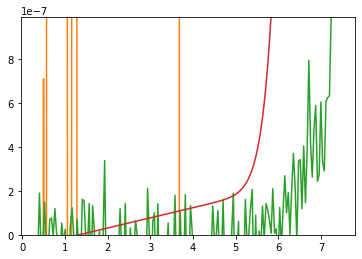

fileN:916,VRXG1NJLUM.json
S=15.88,Phi=4.22,K0=3.65,-1.99e-07,1.18e-07


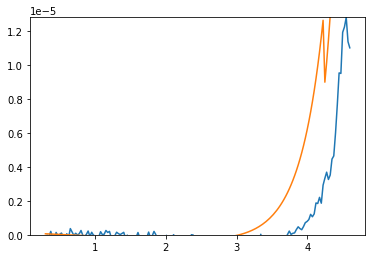

fileN:917,VSSSESOI0V.json
Sigma
fileN:918,VV0V53FEGP.json
fileN:919,VXIBAZYEUV.json
flat
fileN:920,VXVEM7QBE4.json
fileN:921,W3A4HJQ9DY.json
Sigma
S=17.57,Phi=4.22,K0=3.66,Con=8.91e-07,cap=2.92e-05,Vcrit=2.98


c:\pythonproj\tfgpu\lib\site-packages\numpy\core\_methods.py:233: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
c:\pythonproj\tfgpu\lib\site-packages\numpy\core\_methods.py:194: RuntimeWarning: invalid value encountered in true_divide
  arrmean = um.true_divide(
c:\pythonproj\tfgpu\lib\site-packages\numpy\core\_methods.py:226: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


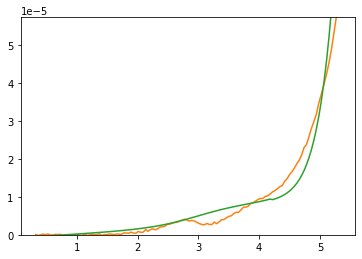

fileN:922,W4XHUN8EUI.json
flat
fileN:923,W6NOXLA5H5.json
flat
fileN:924,W6X9TB506R.json
Sigma
fileN:925,W7S5ODELOG.json
fileN:926,WBFN5M0GY4.json
fileN:927,WDGJZHQ8EK.json
flat
fileN:928,WDVTE0SP0S.json
flat

<ipython-input-9-41611301a7aa>:35: RuntimeWarning: divide by zero encountered in double_scalars
  stdR=np.std(y)/std



fileN:929,WEF3U9W95V.json
Sigma
S=18.19,Phi=4.22,K0=3.69,Con=1.00e-06,cap=2.84e-05,Vcrit=3.78


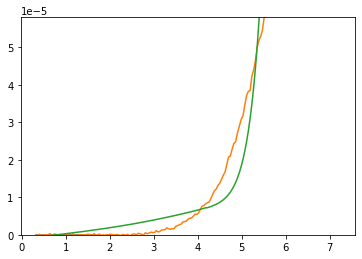

fileN:930,WGRL8CMMXY.json
flat
fileN:931,WH764E6FN0.json
Sigma
S=23.71,Phi=4.27,K0=3.70,Con=-8.25e-08,cap=2.85e-05,Vcrit=3.75


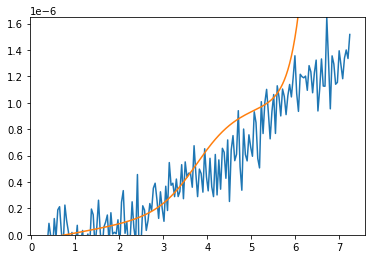

fileN:932,WK9HDGW1JB.json
Sigma
S=23.76,Phi=4.27,K0=3.70,Con=9.07e-07,cap=2.84e-05,Vcrit=2.94


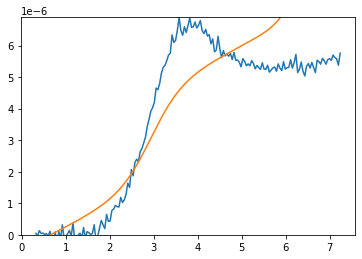

fileN:933,WK9SRYGGI2.json
flat
fileN:934,WN8ON8DA3U.json
flat
fileN:935,WO8HASIBCN.json
flat
fileN:936,WOS32CW6ZC.json
flat
fileN:937,WPSQ7GETDD.json
flat
fileN:938,WQ8ASB8Q7C.json
fileN:939,WRWHYF5OKB.json
fileN:940,WTFJ0JOHFZ.json
fileN:941,WTL9VMD54K.json
fileN:942,WUQTCL9DL6.json
fileN:943,WUUA28JDG2.json
Sigma
S=23.60,Phi=4.26,K0=3.70,Con=4.81e-07,cap=2.83e-05,Vcrit=3.86


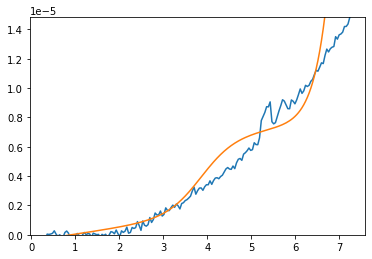

fileN:944,WVMYYUJ8YG.json
Sigma
S=17.37,Phi=4.21,K0=3.66,Con=1.91e-06,cap=2.83e-05,Vcrit=3.81


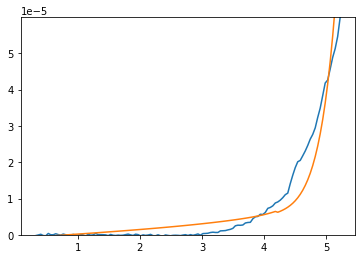

fileN:945,WW2SRGI5O6.json
fileN:946,WYPFZ97P8A.json
Sigma
S=23.57,Phi=4.26,K0=3.67,Con=2.83e-07,cap=2.84e-05,Vcrit=3.05


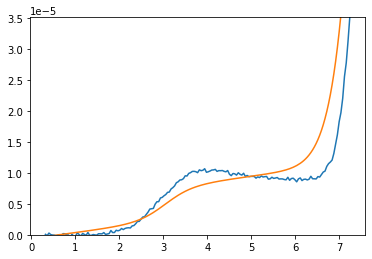

fileN:947,WZ0P490MV6.json
fileN:948,X0VM916SPH.json
fileN:949,X1E5BIPQSW.json
fileN:950,X3EL5366AG.json
fileN:951,X4PBWKL6RP.json
fileN:952,X5X0NVJJ2G.json
fileN:953,X8H1DIE5NU.json
flat
fileN:954,X8YU6N28Q4.json
flat
fileN:955,XAI5ITJDET.json
flat
fileN:956,XB3LFDR0Z4.json
S=15.65,Phi=4.18,K0=3.64,1.03e-08,-3.27e-08


c:\pythonproj\tfgpu\lib\site-packages\numpy\core\_methods.py:233: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
c:\pythonproj\tfgpu\lib\site-packages\numpy\core\_methods.py:194: RuntimeWarning: invalid value encountered in true_divide
  arrmean = um.true_divide(
c:\pythonproj\tfgpu\lib\site-packages\numpy\core\_methods.py:226: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


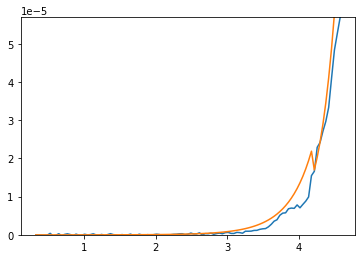

fileN:957,XCCZJY1MOW.json
flat
fileN:958,XDI94XJM88.json
flat
fileN:959,XEMKEICYIG.json
Sigma
fileN:960,XFLFFEWI0Q.json
fileN:961,XHQZE3XG9P.json
fileN:962,XI5BQYMG18.json
S=15.00,Phi=4.18,K0=3.65,-1.92e-07,1.48e-07


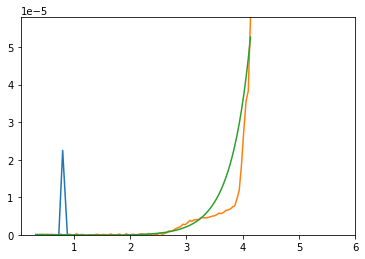

fileN:963,XIDZI1EKRB.json
fileN:964,XIMWNXQZGI.json
fileN:965,XJRT8TEEO9.json
fileN:966,XK7K0BO2X2.json
fileN:967,XKXFCN9IMN.json
fileN:968,XL9QTWCSTW.json
Sigma
S=21.84,Phi=4.22,K0=3.66,Con=1.54e-06,cap=2.85e-05,Vcrit=3.35


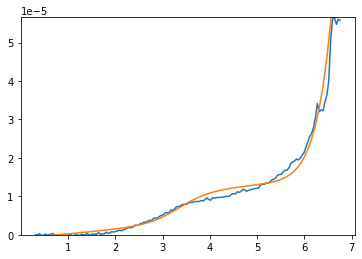

fileN:969,XN5FALXSOG.json
Sigma
S=19.62,Phi=4.21,K0=3.64,Con=-1.08e-07,cap=3.00e-05,Vcrit=3.00


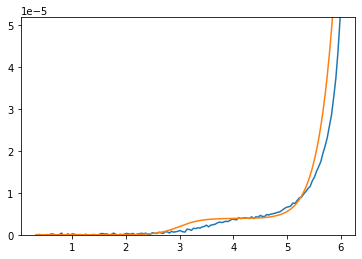

fileN:970,XO2YOYV7NY.json
fileN:971,XOMS5F35U5.json
Sigma
S=15.30,Phi=4.13,K0=3.72,Con=6.32e-08,cap=2.83e-05,Vcrit=2.55


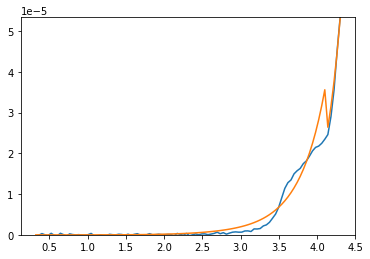

fileN:972,XOOTVE6MAU.json
Sigma
S=18.84,Phi=4.20,K0=3.64,Con=3.38e-06,cap=2.81e-05,Vcrit=2.88


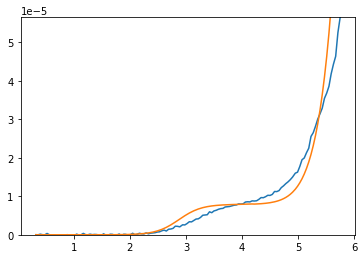

fileN:973,XQAPBLH8BD.json
flat
fileN:974,XQDT98XNKQ.json
Sigma
S=23.70,Phi=4.27,K0=3.70,Con=5.17e-08,cap=2.75e-05,Vcrit=4.07


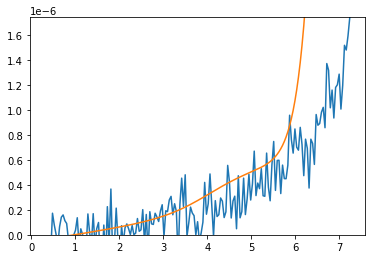

fileN:975,XTGGOT4PL0.json
flat
fileN:976,XTT7847YAT.json
Sigma
fileN:977,XVOCBXCE1M.json
flat
fileN:978,XYB9W7K8K2.json
flat
fileN:979,XYDMZE5BWT.json
Sigma
fileN:980,Y0TQWO7QT9.json
Sigma
S=16.34,Phi=4.24,K0=3.63,Con=8.40e-07,cap=2.95e-05,Vcrit=2.45


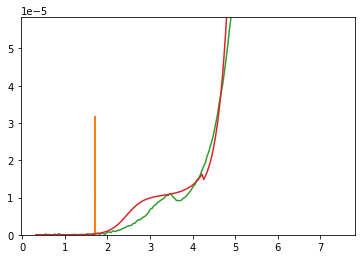

fileN:981,Y2I62BPNI4.json
fileN:982,Y32CUAB0XY.json
Sigma
fileN:983,Y559WQ8ZAY.json
fileN:984,Y9HD8EKXYX.json
flat
fileN:985,YA0Q1GZ07A.json
fileN:986,YB6RY2YLS3.json
S=23.04,Phi=4.21,K0=3.63,6.31e-08,-9.16e-08


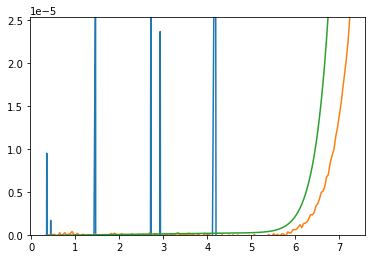

fileN:987,YBNTV3C0FS.json
fileN:988,YBO21XB13D.json
flat
fileN:989,YBT9OHIXIP.json
fileN:990,YC936BT3BS.json
fileN:991,YIBG5TE4NL.json
Sigma
S=17.79,Phi=4.22,K0=3.67,Con=9.82e-07,cap=2.94e-05,Vcrit=2.66


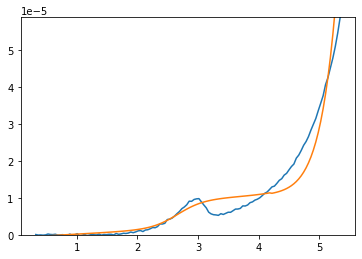

fileN:992,YKVSP481D5.json
Sigma
fileN:993,YLM6YF5D7K.json
fileN:994,YLN0ZJUXUX.json
fileN:995,YMJCMUM7DI.json
flat
fileN:996,YMV7PKV4N3.json
fileN:997,YNECFFO67O.json
fileN:998,YO5MC3SN76.json
fileN:999,YOYGICB0BS.json
Sigma
S=23.74,Phi=4.27,K0=3.70,Con=7.36e-07,cap=2.86e-05,Vcrit=3.40


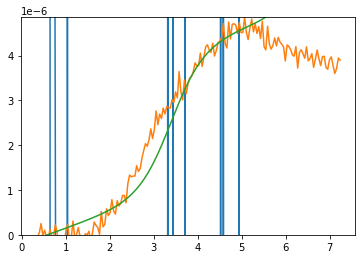

fileN:1000,YPBRKHQ69U.json
flat
fileN:1001,YQP01CLH1A.json
Sigma
S=23.71,Phi=4.27,K0=3.70,Con=1.23e-08,cap=2.87e-05,Vcrit=4.29


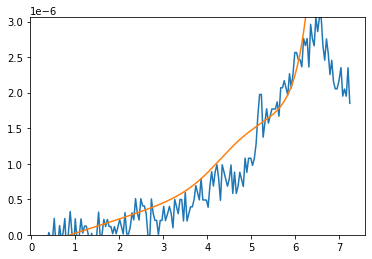

fileN:1002,YSEW57O5GW.json
fileN:1003,YU3MWV4KSM.json
Sigma
S=18.21,Phi=4.22,K0=3.65,Con=1.80e-06,cap=2.87e-05,Vcrit=3.04


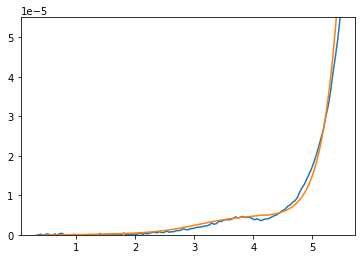

fileN:1004,YVLH8HY42W.json
fileN:1005,YXYGHZ602X.json
fileN:1006,YXYGSA8B9E.json
Sigma
S=23.71,Phi=4.27,K0=3.70,Con=8.67e-08,cap=3.00e-05,Vcrit=3.77


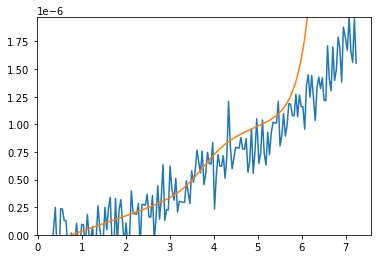

fileN:1007,YZCRNVWQH9.json
fileN:1008,YZPTLUYJGN.json
fileN:1009,Z4NWIXIT3I.json
flat
fileN:1010,Z5JQHY31OW.json
fileN:1011,Z6LJN80NJA.json
flat
fileN:1012,Z82HF2EBQP.json
fileN:1013,Z8QRYUKG14.json
fileN:1014,Z907IABQ5F.json
fileN:1015,ZAQ64OABO7.json
fileN:1016,ZAWJ1REP8U.json
fileN:1017,ZD1DGLQW55.json
fileN:1018,ZDMASFZ4FC.json
Sigma
fileN:1019,ZEZPB53J3Q.json
flat
fileN:1020,ZF6UNV91O1.json
flat
fileN:1021,ZF7DWDQK0E.json
fileN:1022,ZFGB68KP0X.json
fileN:1023,ZIJG67IJOT.json
fileN:1024,ZIMO1HJM1A.json
flat
fileN:1025,ZKKB012MLK.json
Sigma
S=15.81,Phi=4.02,K0=3.75,Con=4.13e-08,cap=2.95e-05,Vcrit=1.78


c:\pythonproj\tfgpu\lib\site-packages\numpy\core\_methods.py:233: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
c:\pythonproj\tfgpu\lib\site-packages\numpy\core\_methods.py:194: RuntimeWarning: invalid value encountered in true_divide
  arrmean = um.true_divide(
c:\pythonproj\tfgpu\lib\site-packages\numpy\core\_methods.py:226: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
<ipython-input-9-41611301a7aa>:35: RuntimeWarning: divide by zero encountered in double_scalars
  stdR=np.std(y)/std


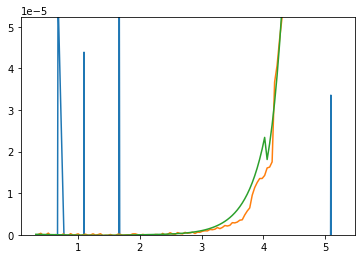

fileN:1026,ZM1ZHCIMR7.json
Sigma
fileN:1027,ZMVTOH62VL.json
Sigma
S=23.71,Phi=4.27,K0=3.70,Con=8.40e-08,cap=2.73e-05,Vcrit=3.95


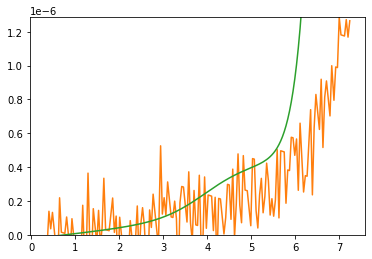

fileN:1028,ZNEO2V227V.json
Sigma
fileN:1029,ZNIS593CUE.json
fileN:1030,ZOEFZUQMF2.json
fileN:1031,ZOX9EB7HCL.json
fileN:1032,ZRW5LYK6UQ.json
flat
fileN:1033,ZUIYQX4DMH.json
fileN:1034,ZV3NZR6Y9K.json
fileN:1035,ZV6QSNIE28.json
Sigma
fileN:1036,ZWMTC8WCFN.json
fileN:1037,ZWU0YMXEJP.json
flat
fileN:1038,ZWV5ZB3SVZ.json
fileN:1039,ZZZKSJN80B.json
Sigma
S=17.90,Phi=4.24,K0=3.68,Con=7.47e-08,cap=2.86e-05,Vcrit=5.27


<ipython-input-9-41611301a7aa>:35: RuntimeWarning: divide by zero encountered in double_scalars
  stdR=np.std(y)/std
c:\pythonproj\tfgpu\lib\site-packages\numpy\core\_methods.py:233: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
c:\pythonproj\tfgpu\lib\site-packages\numpy\core\_methods.py:194: RuntimeWarning: invalid value encountered in true_divide
  arrmean = um.true_divide(
c:\pythonproj\tfgpu\lib\site-packages\numpy\core\_methods.py:226: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
<ipython-input-9-41611301a7aa>:35: RuntimeWarning: divide by zero encountered in double_scalars
  stdR=np.std(y)/std


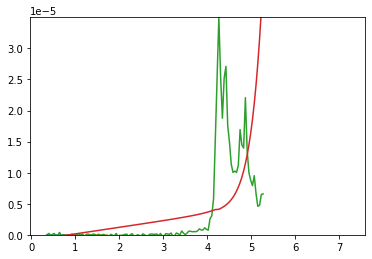

In [14]:
cc=0
for fileN in directories:
#fileN=directories[19]    
    print("fileN:%d,%s"%(cc,fileN))
    cc=cc+1
    try:
#if True:    
        x=[]
        y=[]    
        # opening the CSV file
        with open('D:\\DataStore\\CurvesB\\' + fileN, mode ='r') as file:
          # reading the CSV file
          csvFile = csv.reader(file)
          for lines in csvFile:
                x.append( float(lines[2]))
                y.append(1e6* float(lines[3]))
        x=np.array(x)
        y=np.array(y)
        if x[int(len(x)/2)]<0:
            x=x*-1
            y=y*-1

        x,y,m,c,stdR,std=CutCurves(x,y)
        
        x=x[y<6e-5]
        y=y[y<6e-5]
        


        if (stdR>2):
            S0 =20*np.max(x)/7
            phi00= 4
            K0=3.4
            R0=0
            I0=0
            SigA=y[int(len(x)/3*2)]-y[int(len(x)/3)] 
            SigV0=np.max(x)/2
            SigC=5
            w=3*x+1#+np.sqrt(np.abs(y/std))

            bounds= ((10,1,1, -.0001 ,-.0001),(100,11,11,.00001, .0001))
            
            popt, pcov = curve_fit(
                f=I,       # model function
                xdata=x,   # x data
                ydata=y,   # y data
                sigma =w,
                bounds=bounds,
                p0=(S0 ,phi00 ,K0,R0,I0)      # initial value of the parameters
            )
            plt.plot(x,y)
            S0=popt[0]
            phi00=popt[1]
            K0=popt[2]
            R0=0
            I0=0
            #break
            try:
                w=10*x/np.max(x)+1
                #v,S,phi0,K,R,I0,SigA,SigV0,SigC
                bounds= ((10  ,1  ,1 , -.0001,-.0001,0,0,1),
                         (100 ,11 ,11,  .00001, .0001,y[int(len(x)*.85)],np.max(x), 25))
            
                poptS, pcovS = curve_fit(
                    f=ISig,       # model function
                    xdata=x,   # x data
                    ydata=y,   # y data
                    sigma =w,
                    bounds=bounds,
                    p0=(S0 ,phi00 ,K0,R0,I0,SigA,SigV0,SigC)      # initial value of the parameters
                )
                fIS = ISig(x,poptS[0] ,poptS[1] ,poptS[2],poptS[3],poptS[4],poptS[5],poptS[6],poptS[7] )
                resS=  np.std(y-fIS)
            except:
                resS=res*10
            
            fI = I(x,popt[0] ,popt[1] ,popt[2],popt[3],popt[4] )
            res=  np.std(y-fI)
            
            if (resS<res):
                print('Sigma')
                res=resS
                popt=poptS
                plt.plot(x,fIS)
                plt.ylim([0,np.max(y)])
                print("S=%.2f,Phi=%.2f,K0=%.2f,Con=%.2e,cap=%.2e,Vcrit=%.2f"%(popt[0],popt[1],popt[2],m,c,poptS[6]))
                with open('D:\\DataStore\\Curves2B\\'+ fileN +'_txt', mode ='w') as file:
                    file.write('{ "Conductance__S":' + str(m*1e-6)+ 
                               ',"Error__A":' + str(res) + 
                               ',"Intercept__A":' + str(c*1e-6)+
                               ',"elbow__V":'+str(np.max(x)) +
                               ',"gap__nm":'+str(popt[0]/10) + 
                               ',"eV":'+str(popt[1]) + 
                               ',"breakdown__V":'+str(poptS[6]) + 
                               ',"k":'+str(popt[2])+'}' )         
                fI=fIS+m*x+c
            else:
                plt.plot(x,fI)
                plt.ylim([0,np.max(y)])
                print("S=%.2f,Phi=%.2f,K0=%.2f,%.2e,%.2e"%(popt[0],popt[1],popt[2],popt[3],popt[4]))
                with open('D:\\DataStore\\Curves2B\\'+ fileN +'_txt', mode ='w') as file:
                    file.write('{ "Conductance__S":' + str(m*1e-6)+ 
                               ',"Error__A":' + str(res) + 
                               ',"Intercept__A":' + str(c*1e-6)+
                               ',"elbow__V":'+str(np.max(x)) +
                               ',"gap__nm":'+str(popt[0]/10) + 
                               ',"eV":'+str(popt[1]) + 
                               ',"k":'+str(popt[2])+'}' )
                fI=fI+m*x+c
            with open('D:\\DataStore\\Curves2B\\'+ fileN +'_fit', mode ='w') as file:
                for i in range(1,len(x),10):
                    file.write(str(x[i]) +',' + str(fI[i]*1e-6)+"\n" )
            plt.show()
        else:
            print("flat")
            with open('D:\\DataStore\\Curves2B\\'+ fileN +'_txt', mode ='w') as file:
                file.write('{ "Conductance__S":' + str(m*1e-6)+ 
                           ',"Error__A":' + str(std) + 
                           ',"Intercept__A":' + str(c*1e-6)+
                           ',"elbow__V":'+str(0) +
                           ',"gap__nm":'+str(0) + 
                           ',"eV":'+str(0) + 
                           ',"k":'+str(0)+'}' )
            fI=m*x+c
            with open('D:\\DataStore\\Curves2B\\'+ fileN +'_fit', mode ='w') as file:
                for i in range(1,len(x),10):
                    file.write(str(x[i]) +',' + str(fI[i]*1e-6)+"\n" )
    except:
        pass

In [ ]:
pcovS

In [ ]:
popt